# Homework 5: Adversarial Attacks and Defenses

Duke University

ECE661 Fall 2022

## Setup

You shouldn't have to change anything in these cells

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random

# Custom
import models
import attacks

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

device: cuda


In [2]:
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=True, download=True, transform=transforms.ToTensor()),
    batch_size = 64, shuffle=True, )
test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=False, download=True, transform=transforms.ToTensor()),
    batch_size = 64, shuffle=False, )

In [3]:
def test_model(mdl, loader, device):
    mdl.eval()
    running_correct = 0.
    running_loss = 0.
    running_total = 0.
    with torch.no_grad():
        for batch_idx,(data,labels) in enumerate(loader):
            data = data.to(device); labels = labels.to(device)
            clean_outputs = mdl(data)
            clean_loss = F.cross_entropy(clean_outputs, labels)
            _,clean_preds = clean_outputs.max(1)
            running_correct += clean_preds.eq(labels).sum().item()
            running_loss += clean_loss.item()
            running_total += labels.size(0)
    clean_acc = running_correct/running_total
    clean_loss = running_loss/len(loader)
    mdl.train()
    return clean_acc,clean_loss

## Model training

Train a model and save the checkpoint. This cell is used in Lab-1 and Lab-3

In [4]:
## Pick a model architecture
net = models.NetA().to(device)

## Checkpoint name for this model
model_checkpoint = "netA_standard.pt"

## Basic training params
num_epochs = 20
initial_lr = 0.001
lr_decay_epoch = 15

optimizer = torch.optim.Adam(net.parameters(), lr=initial_lr)

## Training Loop
for epoch in range(num_epochs):
    net.train()
    train_correct = 0.
    train_loss = 0.
    train_total = 0.
    for batch_idx,(data,labels) in enumerate(train_loader):
        data = data.to(device); labels = labels.to(device)

        # Forward pass
        outputs = net(data)
        net.zero_grad()
        optimizer.zero_grad()
        # Compute loss, gradients, and update params
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        # Update stats
        _,preds = outputs.max(1)
        train_correct += preds.eq(labels).sum().item()
        train_loss += loss.item()
        train_total += labels.size(0)

    # End of training epoch
    test_acc,test_loss = test_model(net,test_loader,device)
    print("Epoch: [ {} / {} ]; TrainAcc: {:.5f}; TrainLoss: {:.5f}; TestAcc: {:.5f}; TestLoss: {:.5f}".format(
        epoch, num_epochs, train_correct/train_total, train_loss/len(train_loader),
        test_acc, test_loss,
    ))
    # Save model
    torch.save(net.state_dict(), model_checkpoint)

    # Update LR
    if epoch == lr_decay_epoch:
        for param_group in optimizer.param_groups:
            param_group['lr'] = initial_lr*0.1

print("Done!")

Epoch: [ 0 / 20 ]; TrainAcc: 0.85143; TrainLoss: 0.41393; TestAcc: 0.87970; TestLoss: 0.32310
Epoch: [ 1 / 20 ]; TrainAcc: 0.90287; TrainLoss: 0.26504; TestAcc: 0.89320; TestLoss: 0.28553
Epoch: [ 2 / 20 ]; TrainAcc: 0.91682; TrainLoss: 0.22561; TestAcc: 0.91010; TestLoss: 0.24639
Epoch: [ 3 / 20 ]; TrainAcc: 0.92715; TrainLoss: 0.19540; TestAcc: 0.91080; TestLoss: 0.25006
Epoch: [ 4 / 20 ]; TrainAcc: 0.93577; TrainLoss: 0.17420; TestAcc: 0.91570; TestLoss: 0.23376
Epoch: [ 5 / 20 ]; TrainAcc: 0.94437; TrainLoss: 0.14985; TestAcc: 0.91290; TestLoss: 0.25385
Epoch: [ 6 / 20 ]; TrainAcc: 0.95073; TrainLoss: 0.13326; TestAcc: 0.91860; TestLoss: 0.24328
Epoch: [ 7 / 20 ]; TrainAcc: 0.95830; TrainLoss: 0.11515; TestAcc: 0.90140; TestLoss: 0.29553
Epoch: [ 8 / 20 ]; TrainAcc: 0.96398; TrainLoss: 0.10037; TestAcc: 0.91590; TestLoss: 0.28982
Epoch: [ 9 / 20 ]; TrainAcc: 0.96760; TrainLoss: 0.08642; TestAcc: 0.91890; TestLoss: 0.30992
Epoch: [ 10 / 20 ]; TrainAcc: 0.97167; TrainLoss: 0.07532; T

In [5]:
## Pick a model architecture
# net = models.NetA().to(device)
net = models.NetB().to(device)

## Checkpoint name for this model
# model_checkpoint = "netA_standard.pt"
model_checkpoint = "netB_standard.pt"

## Basic training params
num_epochs = 20
initial_lr = 0.001
lr_decay_epoch = 15

optimizer = torch.optim.Adam(net.parameters(), lr=initial_lr)

## Training Loop
for epoch in range(num_epochs):
    net.train()
    train_correct = 0.
    train_loss = 0.
    train_total = 0.
    for batch_idx,(data,labels) in enumerate(train_loader):
        data = data.to(device); labels = labels.to(device)

        # Forward pass
        outputs = net(data)
        net.zero_grad()
        optimizer.zero_grad()
        # Compute loss, gradients, and update params
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        # Update stats
        _,preds = outputs.max(1)
        train_correct += preds.eq(labels).sum().item()
        train_loss += loss.item()
        train_total += labels.size(0)

    # End of training epoch
    test_acc,test_loss = test_model(net,test_loader,device)
    print("Epoch: [ {} / {} ]; TrainAcc: {:.5f}; TrainLoss: {:.5f}; TestAcc: {:.5f}; TestLoss: {:.5f}".format(
        epoch, num_epochs, train_correct/train_total, train_loss/len(train_loader),
        test_acc, test_loss,
    ))
    # Save model
    torch.save(net.state_dict(), model_checkpoint)

    # Update LR
    if epoch == lr_decay_epoch:
        for param_group in optimizer.param_groups:
            param_group['lr'] = initial_lr*0.1

print("Done!")

Epoch: [ 0 / 20 ]; TrainAcc: 0.84315; TrainLoss: 0.43110; TestAcc: 0.89110; TestLoss: 0.30180
Epoch: [ 1 / 20 ]; TrainAcc: 0.90373; TrainLoss: 0.26601; TestAcc: 0.89830; TestLoss: 0.27304
Epoch: [ 2 / 20 ]; TrainAcc: 0.91830; TrainLoss: 0.22435; TestAcc: 0.91220; TestLoss: 0.23669
Epoch: [ 3 / 20 ]; TrainAcc: 0.92800; TrainLoss: 0.19606; TestAcc: 0.90400; TestLoss: 0.28050
Epoch: [ 4 / 20 ]; TrainAcc: 0.93635; TrainLoss: 0.17438; TestAcc: 0.90890; TestLoss: 0.25205
Epoch: [ 5 / 20 ]; TrainAcc: 0.94330; TrainLoss: 0.15611; TestAcc: 0.92090; TestLoss: 0.22767
Epoch: [ 6 / 20 ]; TrainAcc: 0.94855; TrainLoss: 0.13904; TestAcc: 0.92170; TestLoss: 0.23728
Epoch: [ 7 / 20 ]; TrainAcc: 0.95495; TrainLoss: 0.12245; TestAcc: 0.91780; TestLoss: 0.25907
Epoch: [ 8 / 20 ]; TrainAcc: 0.95903; TrainLoss: 0.11098; TestAcc: 0.92340; TestLoss: 0.24571
Epoch: [ 9 / 20 ]; TrainAcc: 0.96483; TrainLoss: 0.09597; TestAcc: 0.92170; TestLoss: 0.26206
Epoch: [ 10 / 20 ]; TrainAcc: 0.96857; TrainLoss: 0.08415; T

**Visualize some perturbed samples**

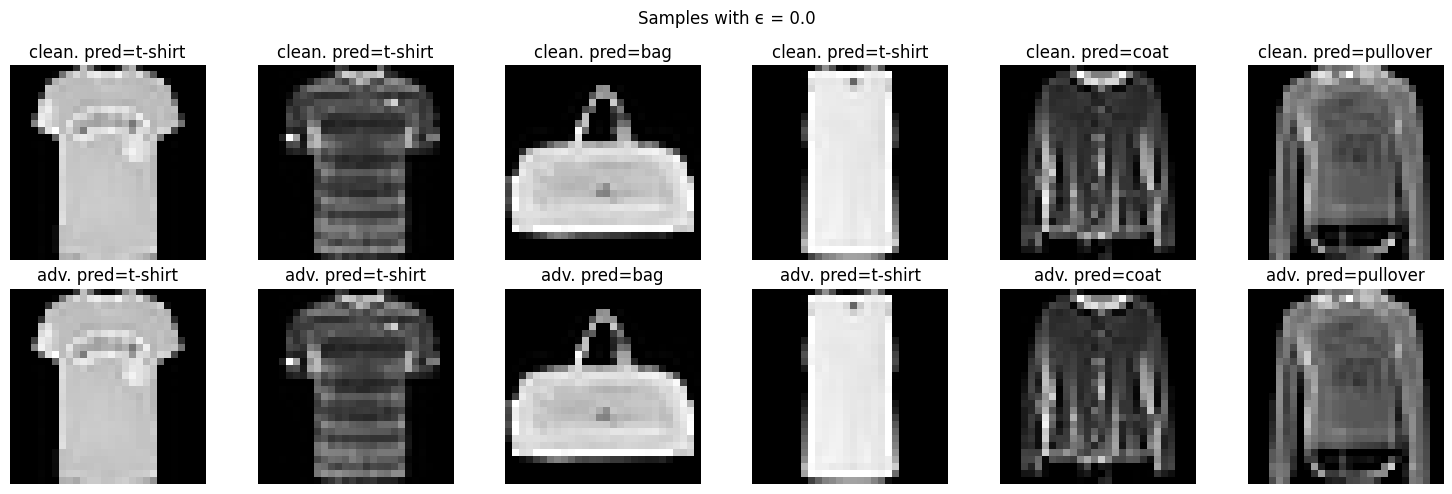

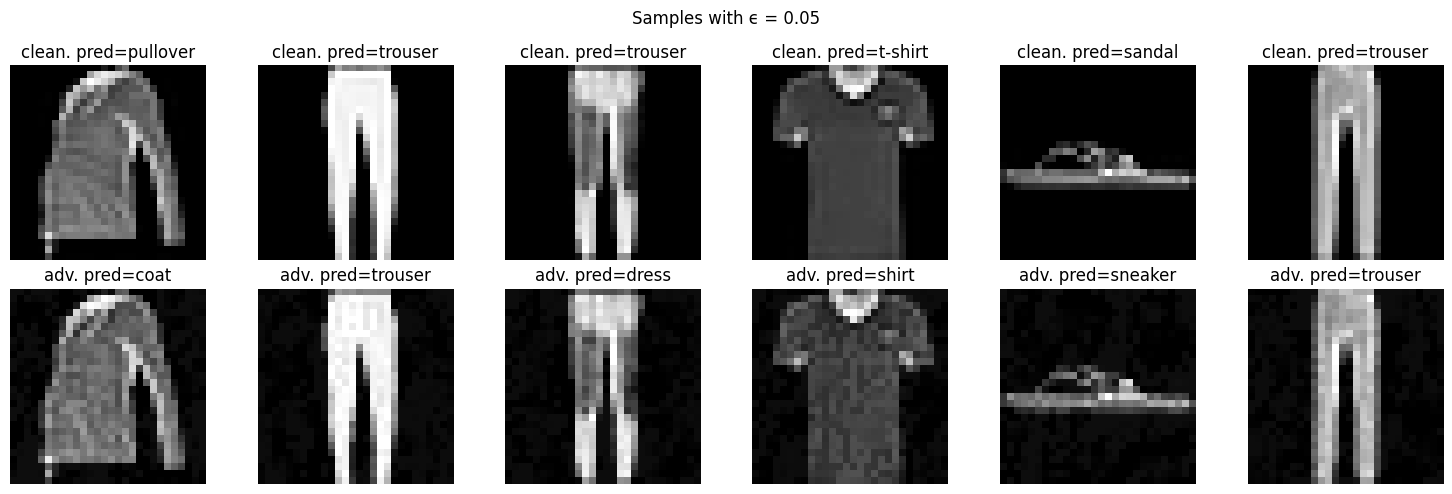

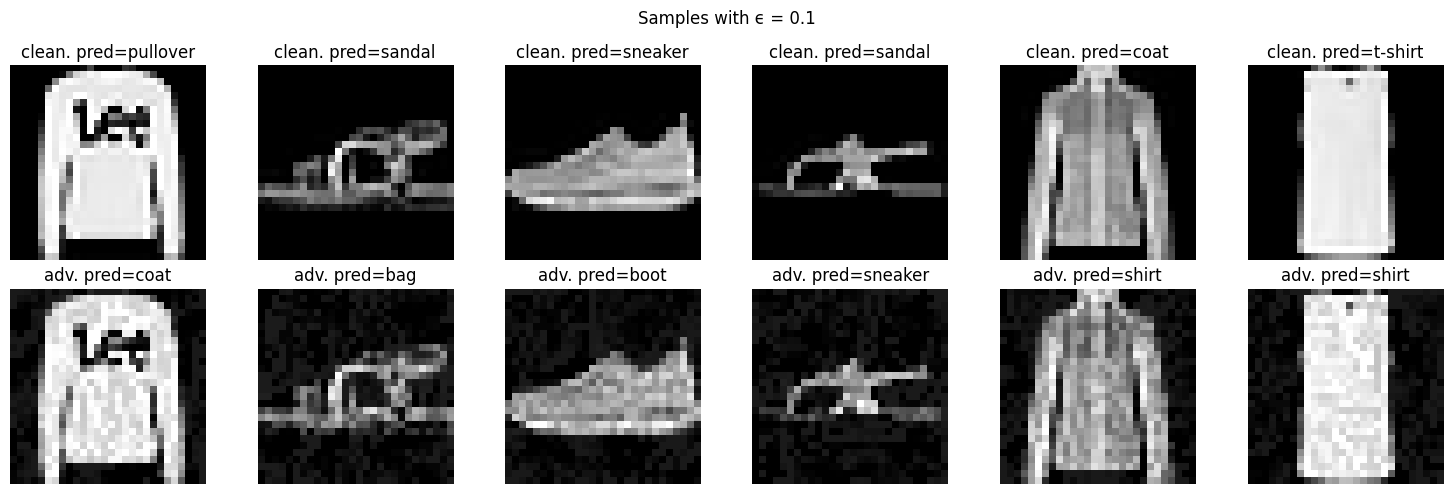

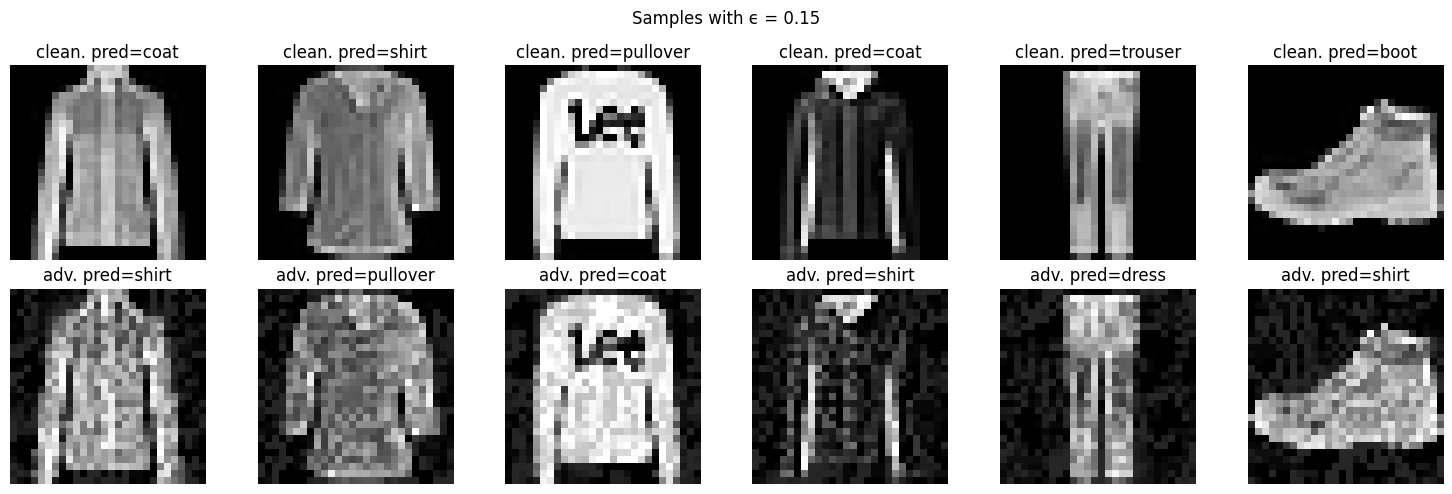

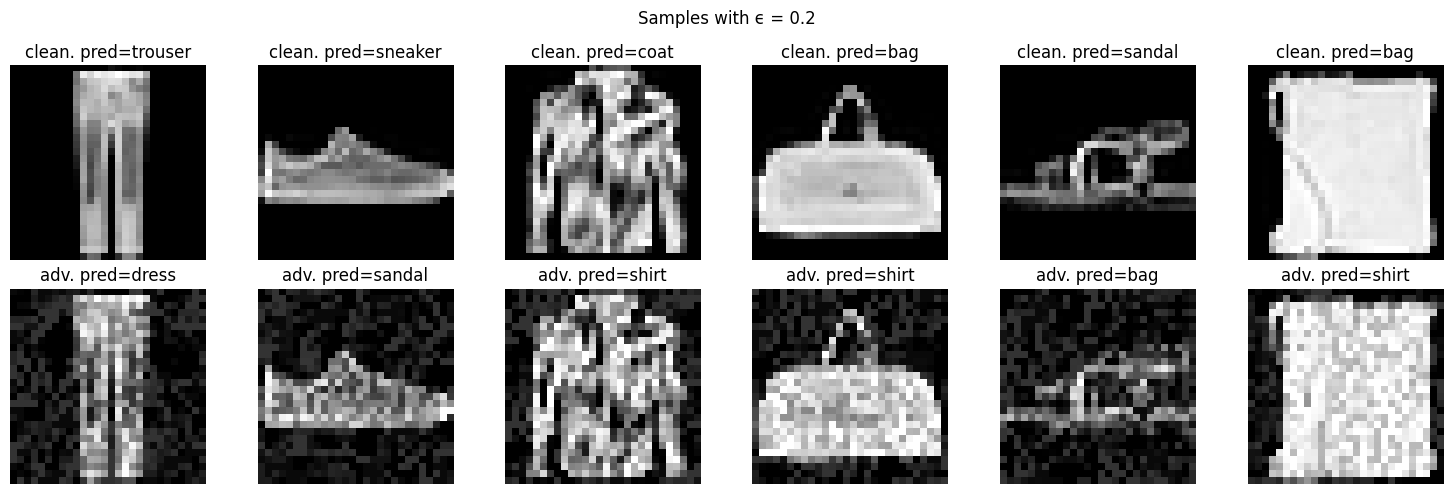

In [6]:
classes = ["t-shirt", "trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","boot"]
net = models.NetA().to(device)
net.load_state_dict(torch.load("netA_standard.pt"))

# Set the parameters for the PGD attack
epsilons = [0.0, 0.05, 0.1, 0.15, 0.2]  # Different values of epsilon

for EPS in epsilons:
    for data, labels in test_loader:
        data = data.to(device); labels = labels.to(device)

        # Compute and apply adversarial perturbation to data
        ITS = 10  # Number of iterations for attack
        ALP = 1.85 * (EPS / ITS)
        adv_data = attacks.PGD_attack(net, device, data, labels, EPS, ALP, ITS, rand_start=True)

        # Compute predictions for clean and adversarial data
        with torch.no_grad():
            clean_outputs = net(data)
            _, clean_preds = clean_outputs.max(1)
            clean_preds = clean_preds.cpu().squeeze().numpy()

            adv_outputs = net(adv_data)
            _, adv_preds = adv_outputs.max(1)
            adv_preds = adv_preds.cpu().squeeze().numpy()

        # Plot some samples
        inds = random.sample(list(range(data.size(0))),6)
        plt.figure(figsize=(15,5))
        for jj in range(6):
            plt.subplot(2,6,jj+1);plt.imshow(data[inds[jj],0].cpu().numpy(),cmap='gray');plt.axis("off");
            plt.title("clean. pred={}".format(classes[clean_preds[inds[jj]]]))
        for jj in range(6):
            plt.subplot(2,6,6+jj+1);plt.imshow(adv_data[inds[jj],0].cpu().numpy(),cmap='gray');plt.axis("off");
            plt.title("adv. pred={}".format(classes[adv_preds[inds[jj]]]))
        plt.suptitle(f"Samples with ϵ = {EPS}")
        plt.tight_layout()
        plt.show()

        # Break after the first batch
        break


### Lab1(b): show that epsilon = 0 computed adversarial example is identical to the origianl input image

With EPS = 0.0, are the original and adversarial images identical? Yes


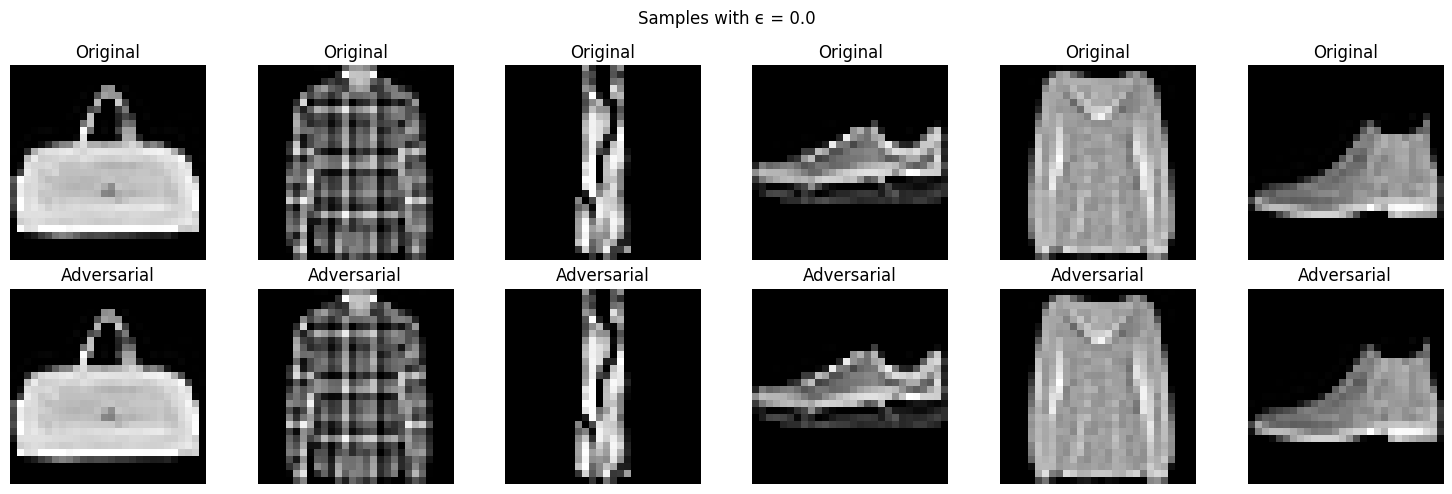

In [7]:
net = models.NetA().to(device)
net.load_state_dict(torch.load("netA_standard.pt"))

# Test the edge case for EPS = 0.0
EPS = 0.0  # Set epsilon to 0
ITS = 10   # Number of iterations for the attack
ALP = 1.85 * (EPS / ITS)  # Alpha for the attack

for data, labels in test_loader:
    data = data.to(device); labels = labels.to(device)

    # Compute and apply adversarial perturbation to data
    adv_data = attacks.PGD_attack(net, device, data, labels, EPS, ALP, ITS, rand_start=True)

    # Ensure the adversarial data is the same as the original data
    identical = torch.all(data == adv_data).item()

    # Display results
    print(f"With EPS = {EPS}, are the original and adversarial images identical? {'Yes' if identical else 'No'}")

    # Plot some samples for visual confirmation
    inds = random.sample(list(range(data.size(0))), 6)
    plt.figure(figsize=(15, 5))
    for jj in range(6):
        plt.subplot(2, 6, jj + 1); plt.imshow(data[inds[jj], 0].cpu().numpy(), cmap='gray'); plt.axis("off");
        plt.title("Original")
    for jj in range(6):
        plt.subplot(2, 6, 6 + jj + 1); plt.imshow(adv_data[inds[jj], 0].cpu().numpy(), cmap='gray'); plt.axis("off");
        plt.title("Adversarial")
    plt.suptitle(f"Samples with ϵ = {EPS}")
    plt.tight_layout()
    plt.show()

    # Break after the first batch
    break


### Lab1(c): FGSM perturbed samples visualization

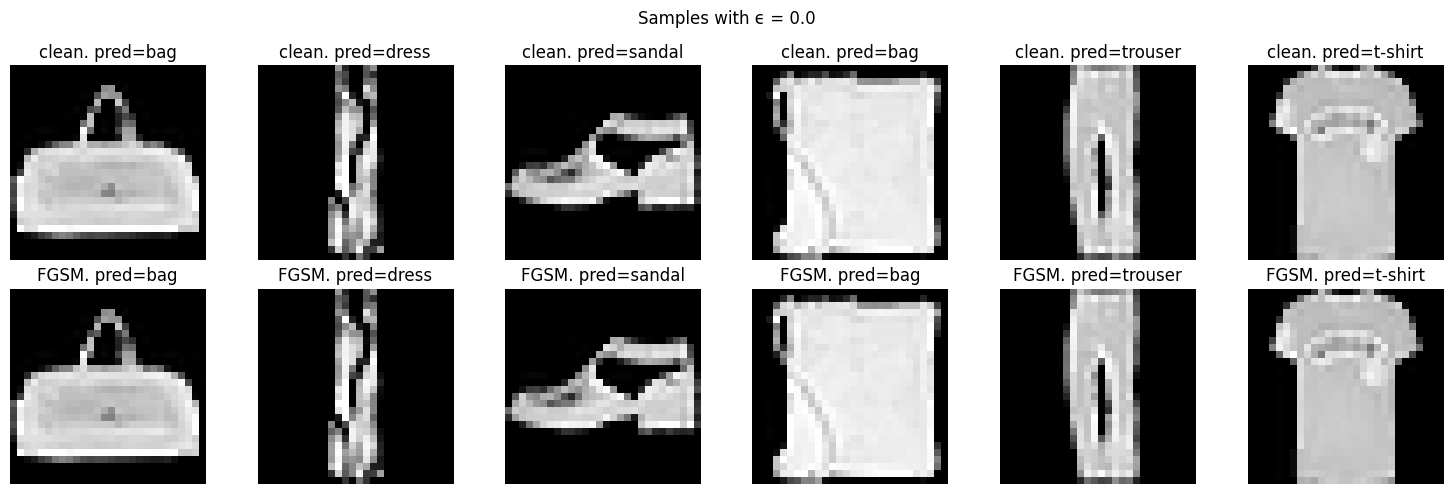

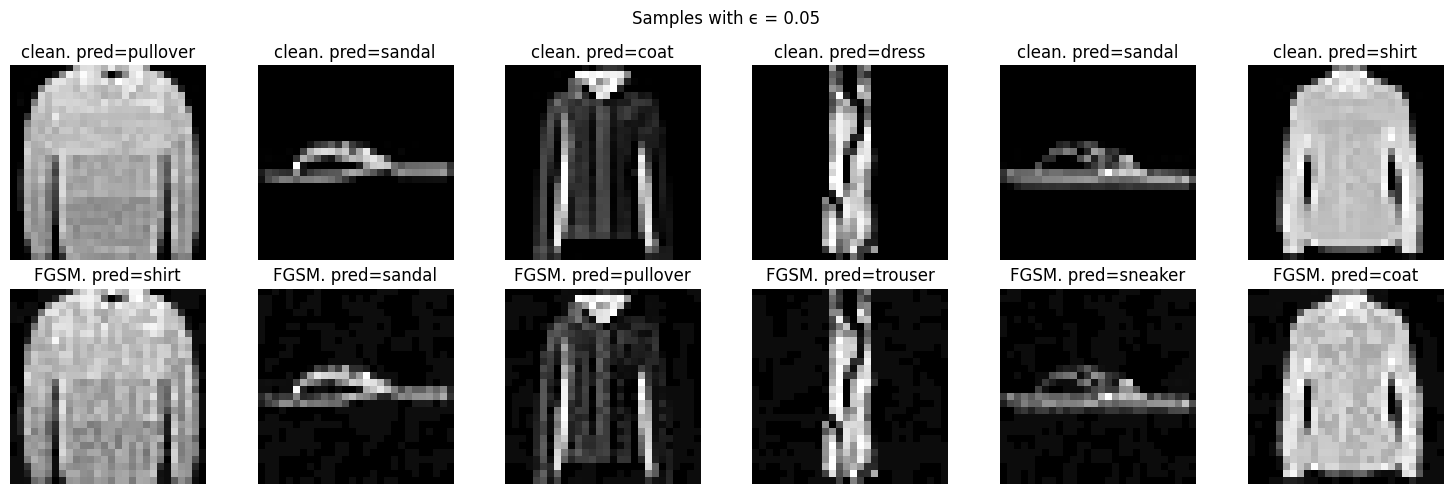

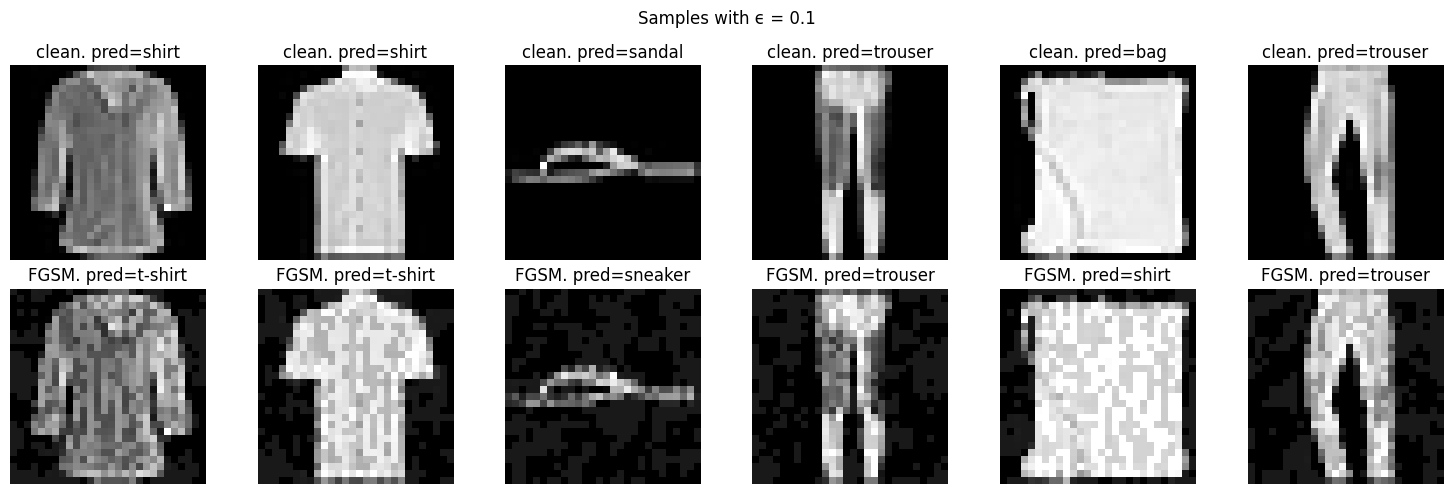

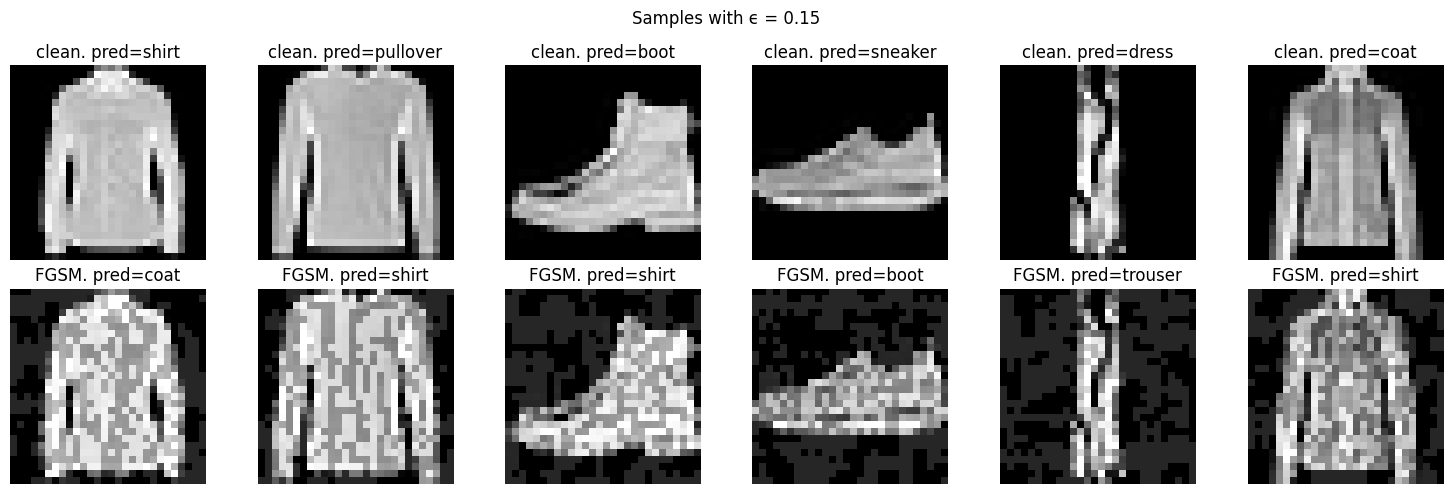

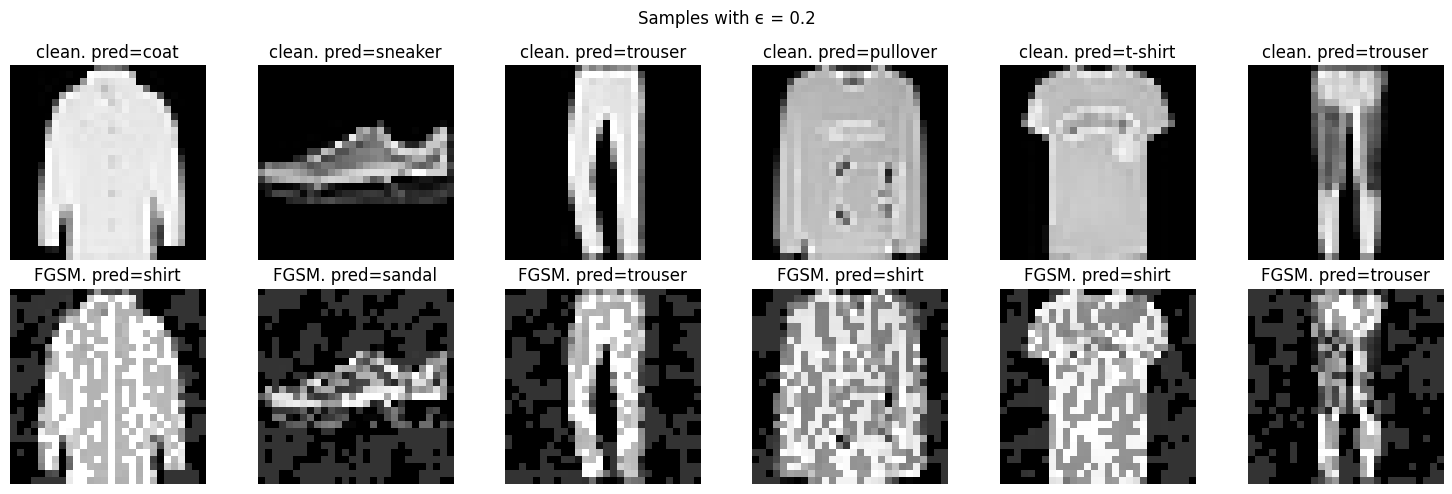

In [8]:
classes = ["t-shirt", "trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","boot"]
net = models.NetA().to(device)
net.load_state_dict(torch.load("netA_standard.pt"))

# Set the parameters for the PGD attack
epsilons = [0.0, 0.05, 0.1, 0.15, 0.2]  # Different values of epsilon

for EPS in epsilons:
    for data, labels in test_loader:
        data = data.to(device); labels = labels.to(device)

        # Compute and apply adversarial perturbation to data
        ITS = 10  # Number of iterations for attack
        ALP = 1.85 * (EPS / ITS)
        # Compute and apply FGSM perturbation to data
        fgsm_data = attacks.FGSM_attack(net, device, data, labels, EPS)

        # Compute predictions for clean and adversarial data
        with torch.no_grad():
            clean_outputs = net(data)
            _, clean_preds = clean_outputs.max(1)
            clean_preds = clean_preds.cpu().squeeze().numpy()

            fgsm_outputs = net(fgsm_data)
            _, fgsm_preds = fgsm_outputs.max(1)
            fgsm_preds = fgsm_preds.cpu().squeeze().numpy()

        # Plot some samples
        inds = random.sample(list(range(data.size(0))),6)
        plt.figure(figsize=(15,5))
        for jj in range(6):
            plt.subplot(2,6,jj+1);plt.imshow(data[inds[jj],0].cpu().numpy(),cmap='gray');plt.axis("off");
            plt.title("clean. pred={}".format(classes[clean_preds[inds[jj]]]))
        for jj in range(6):
            plt.subplot(2,6,6+jj+1);plt.imshow(fgsm_data[inds[jj],0].cpu().numpy(),cmap='gray');plt.axis("off");
            plt.title("FGSM. pred={}".format(classes[fgsm_preds[inds[jj]]]))
        plt.suptitle(f"Samples with ϵ = {EPS}")
        plt.tight_layout()
        plt.show()

        # Break after the first batch
        break


### Lab1(d): L2 contrained FGM perturbed samples visualization

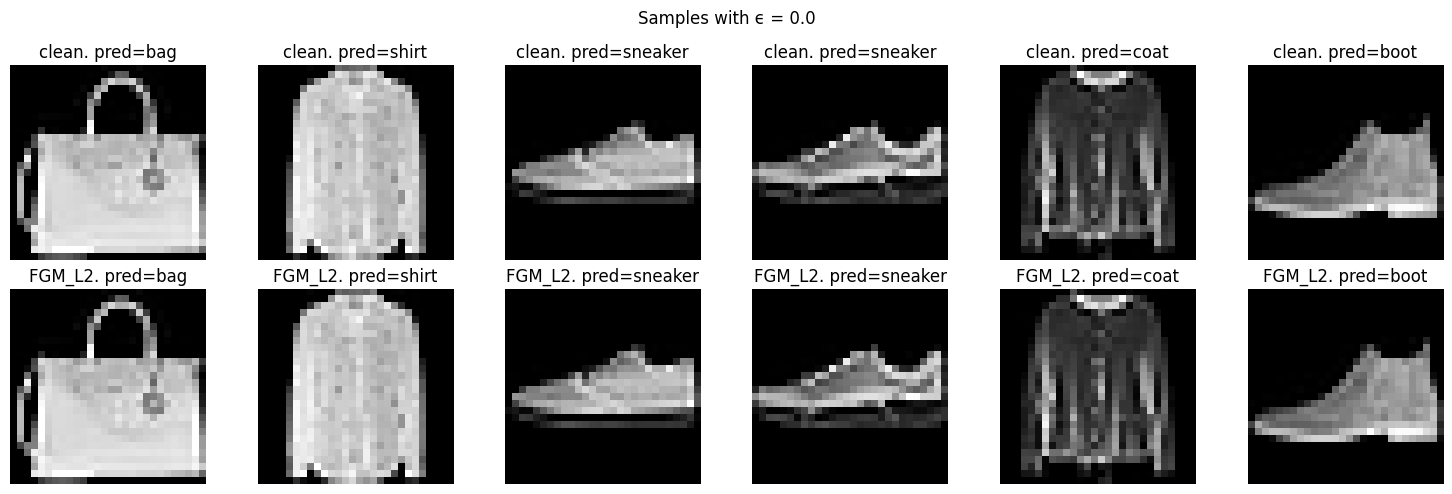

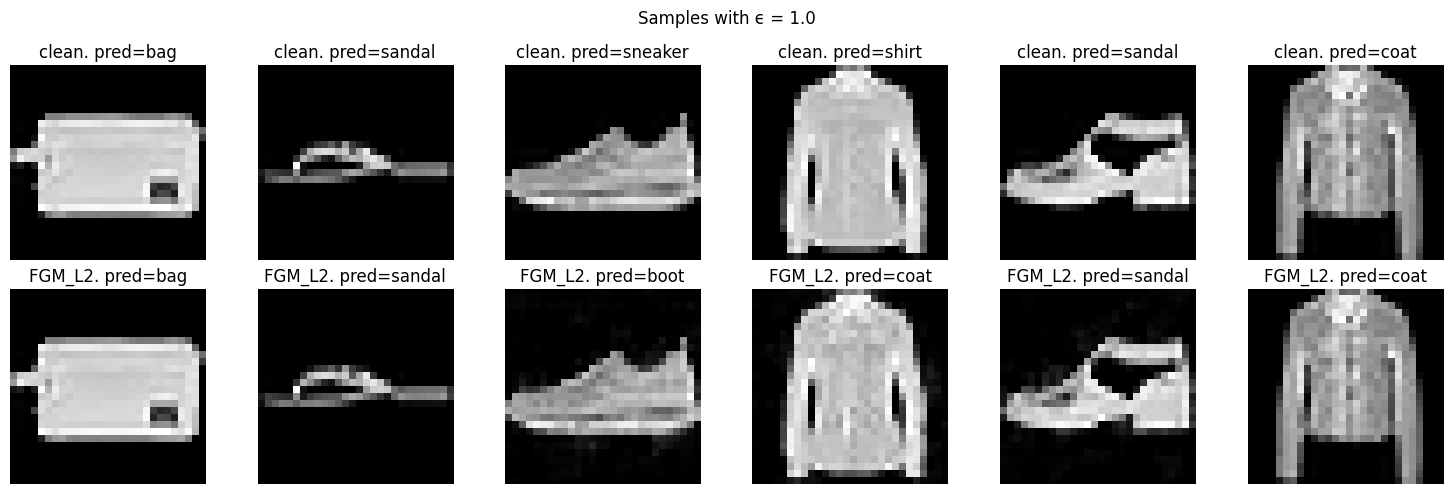

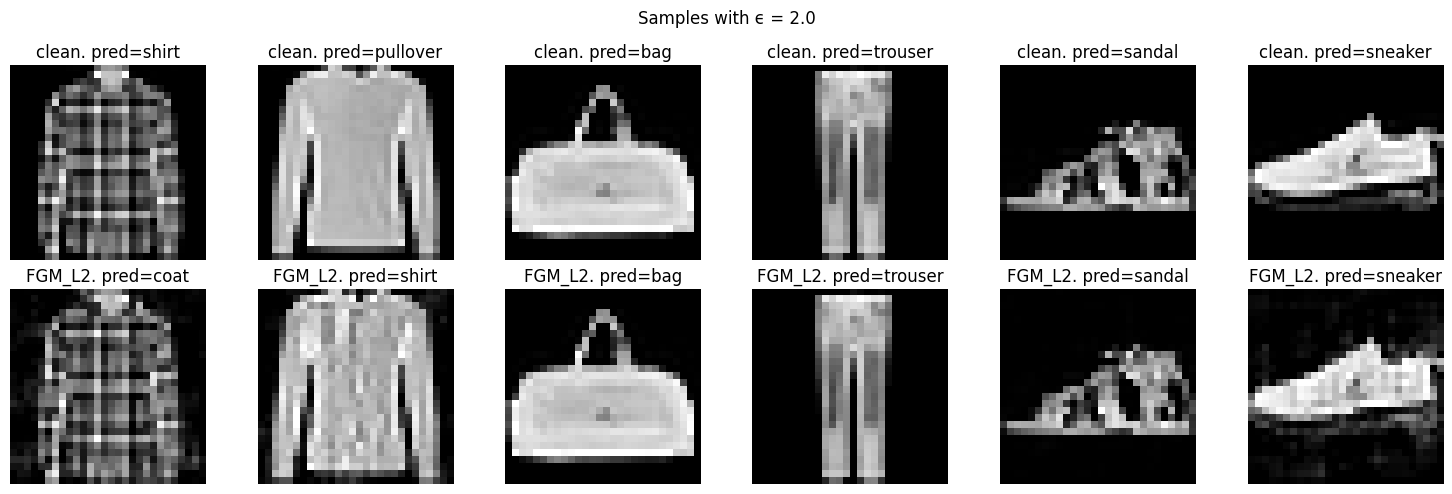

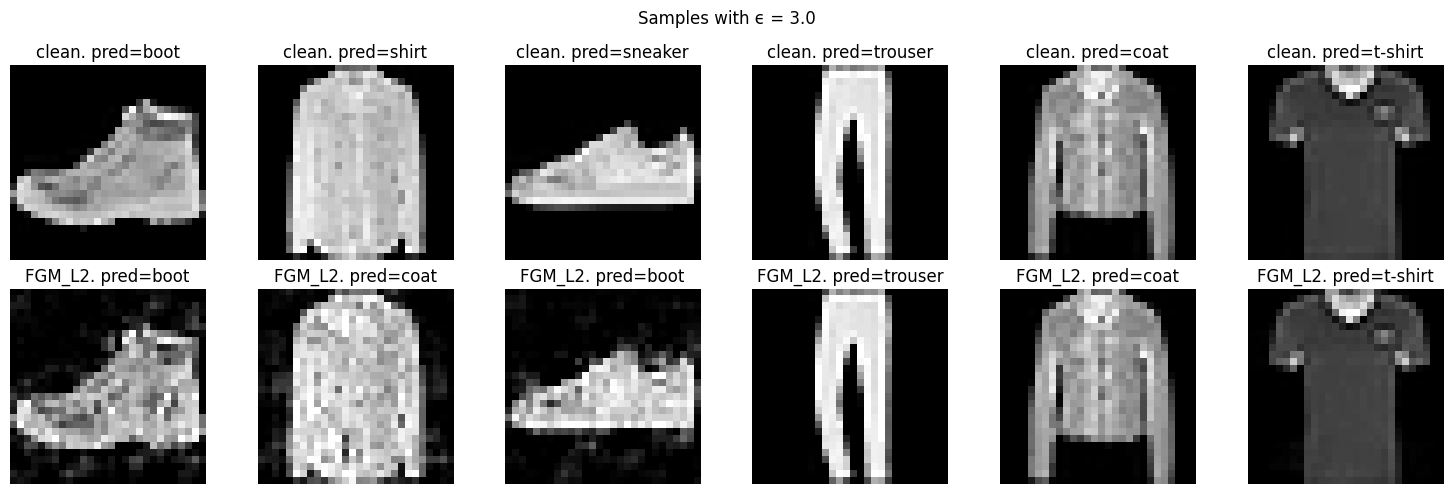

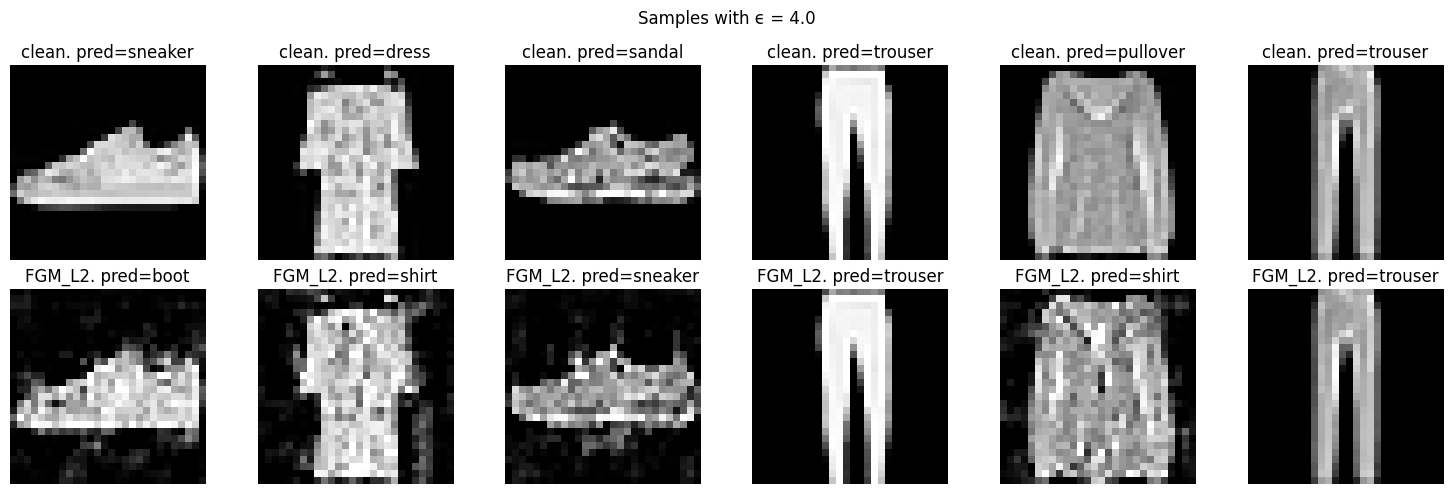

In [9]:
# Define the range of epsilon values
epsilons = [0.0, 1.0, 2.0, 3.0, 4.0]

classes = ["t-shirt", "trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","boot"]
net = models.NetA().to(device)
net.load_state_dict(torch.load("netA_standard.pt"))

# Set the parameters for the PGD attack
epsilons = [0.0, 1.0, 2.0, 3.0, 4.0]

for EPS in epsilons:
    for data, labels in test_loader:
        data = data.to(device); labels = labels.to(device)

        # Compute and apply adversarial perturbation to data
        ITS = 10  # Number of iterations for attack
        ALP = 1.85 * (EPS / ITS)
        # Compute and apply FGM_L2 perturbation to data
        fgm_l2_data = attacks.FGM_L2_attack(net, device, data, labels, EPS)

        # Compute predictions for clean and adversarial data
        with torch.no_grad():
            clean_outputs = net(data)
            _, clean_preds = clean_outputs.max(1)
            clean_preds = clean_preds.cpu().squeeze().numpy()

            fgm_l2_outputs = net(fgm_l2_data)
            _, fgm_l2_preds = fgm_l2_outputs.max(1)
            fgm_l2_preds = fgm_l2_preds.cpu().squeeze().numpy()

        # Plot some samples
        inds = random.sample(list(range(data.size(0))),6)
        plt.figure(figsize=(15,5))
        for jj in range(6):
            plt.subplot(2,6,jj+1);plt.imshow(data[inds[jj],0].cpu().numpy(),cmap='gray');plt.axis("off");
            plt.title("clean. pred={}".format(classes[clean_preds[inds[jj]]]))
        for jj in range(6):
            plt.subplot(2,6,6+jj+1);plt.imshow(fgm_l2_data[inds[jj],0].cpu().numpy(),cmap='gray');plt.axis("off");
            plt.title("FGM_L2. pred={}".format(classes[fgm_l2_preds[inds[jj]]]))
        plt.suptitle(f"Samples with ϵ = {EPS}")
        plt.tight_layout()
        plt.show()

        # Break after the first batch
        break


## Test Attacks - Whitebox & Blackbox

Don't forget to plot accuracy vs. epsilon curves!

### Lab2(b): Random Attack

Initial Accuracy of Whitebox Model:  0.9246
Initial Accuracy of Blackbox Model:  0.924
Attack Epsilon: 0.0; Whitebox Accuracy: 0.92; Blackbox Accuracy: 0.92
Attack Epsilon: 0.01; Whitebox Accuracy: 0.92; Blackbox Accuracy: 0.92
Attack Epsilon: 0.02; Whitebox Accuracy: 0.92; Blackbox Accuracy: 0.92
Attack Epsilon: 0.03; Whitebox Accuracy: 0.92; Blackbox Accuracy: 0.92
Attack Epsilon: 0.04; Whitebox Accuracy: 0.92; Blackbox Accuracy: 0.92
Attack Epsilon: 0.05; Whitebox Accuracy: 0.91; Blackbox Accuracy: 0.90
Attack Epsilon: 0.06; Whitebox Accuracy: 0.91; Blackbox Accuracy: 0.90
Attack Epsilon: 0.07; Whitebox Accuracy: 0.91; Blackbox Accuracy: 0.89
Attack Epsilon: 0.08; Whitebox Accuracy: 0.91; Blackbox Accuracy: 0.88
Attack Epsilon: 0.09; Whitebox Accuracy: 0.90; Blackbox Accuracy: 0.87
Attack Epsilon: 0.1; Whitebox Accuracy: 0.90; Blackbox Accuracy: 0.85


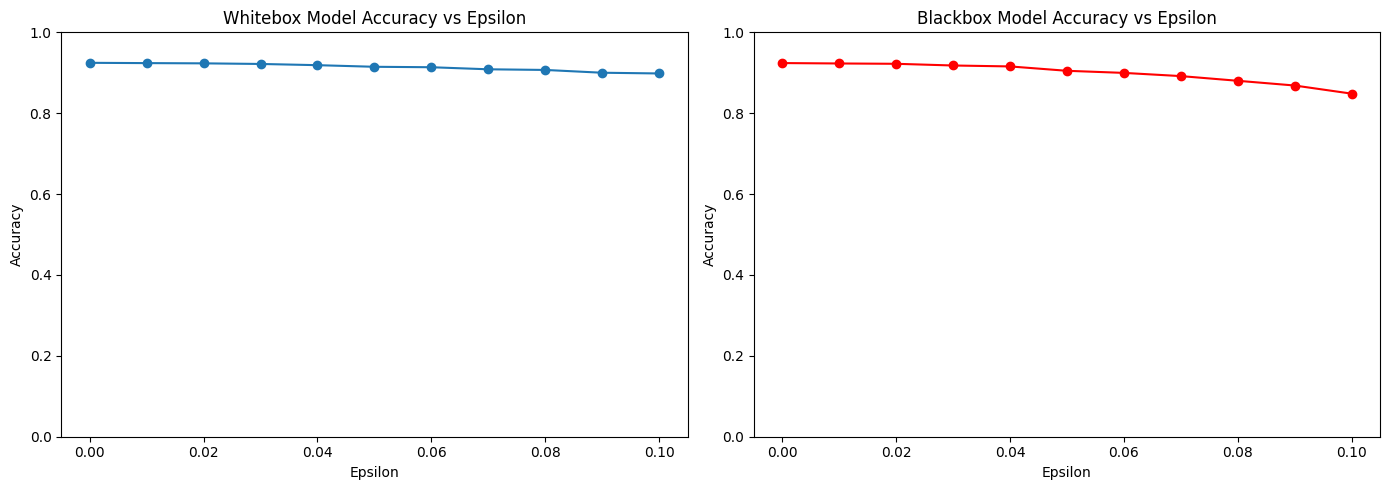

Done!


In [23]:
# Load pretrained models
whitebox = models.NetA()
blackbox = models.NetB()

whitebox.load_state_dict(torch.load("netA_standard.pt"))
blackbox.load_state_dict(torch.load("netB_standard.pt"))

whitebox = whitebox.to(device); blackbox = blackbox.to(device)
whitebox.eval(); blackbox.eval()

test_acc,_ = test_model(whitebox,test_loader,device)
print("Initial Accuracy of Whitebox Model: ",test_acc)
test_acc,_ = test_model(blackbox,test_loader,device)
print("Initial Accuracy of Blackbox Model: ",test_acc)

# Test the models against an adversarial attack
epsilons = np.linspace(0, 0.1, 11)  # Epsilon values for the attack

# Initialize lists to keep track of accuracies
whitebox_accuracies = []
blackbox_accuracies = []

# Random noise attack
for ATK_EPS in epsilons:
    whitebox_correct = 0.
    blackbox_correct = 0.
    running_total = 0.
    for batch_idx, (data, labels) in enumerate(test_loader):
        data = data.to(device)
        labels = labels.to(device)

        # Perform random noise attack
        adv_data = attacks.random_noise_attack(whitebox, device, data, ATK_EPS)

        # Sanity checking if adversarial example is "legal"
        assert(torch.max(torch.abs(adv_data-data)) <= (ATK_EPS + 1e-5) )
        assert(adv_data.max() == 1.)
        assert(adv_data.min() == 0.)

        # Compute accuracy on perturbed data
        with torch.no_grad():
            # Stat keeping - whitebox
            whitebox_outputs = whitebox(adv_data)
            _,whitebox_preds = whitebox_outputs.max(1)
            whitebox_correct += whitebox_preds.eq(labels).sum().item()

            # Stat keeping - blackbox
            blackbox_outputs = blackbox(adv_data)
            _,blackbox_preds = blackbox_outputs.max(1)
            blackbox_correct += blackbox_preds.eq(labels).sum().item()
            running_total += labels.size(0)

    whitebox_acc = whitebox_correct / running_total
    blackbox_acc = blackbox_correct / running_total

    whitebox_accuracies.append(whitebox_acc)
    blackbox_accuracies.append(blackbox_acc)

    # Print accuracies for each epsilon
    print("Attack Epsilon: {}; Whitebox Accuracy: {:.2f}; Blackbox Accuracy: {:.2f}".format(ATK_EPS, whitebox_acc, blackbox_acc))

plt.figure(figsize=(14, 5))  # Increased the width here

# Plot for Whitebox Model
plt.subplot(1, 2, 1)
plt.plot(epsilons, whitebox_accuracies, marker='o')
plt.title('Whitebox Model Accuracy vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Plot for Blackbox Model
plt.subplot(1, 2, 2)
plt.plot(epsilons, blackbox_accuracies, marker='o', color='r')
plt.title('Blackbox Model Accuracy vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()
print("Done!")

### Lab2(c): Whitebox Attack

Initial Accuracy of Whitebox Model:  0.9246
Attack Epsilon: 0.00; FGSM Accuracy: 0.92; rFGSM Accuracy: 0.92; PGD Accuracy: 0.92
Attack Epsilon: 0.01; FGSM Accuracy: 0.71; rFGSM Accuracy: 0.75; PGD Accuracy: 0.67
Attack Epsilon: 0.02; FGSM Accuracy: 0.59; rFGSM Accuracy: 0.61; PGD Accuracy: 0.43
Attack Epsilon: 0.03; FGSM Accuracy: 0.52; rFGSM Accuracy: 0.53; PGD Accuracy: 0.29
Attack Epsilon: 0.04; FGSM Accuracy: 0.46; rFGSM Accuracy: 0.47; PGD Accuracy: 0.20
Attack Epsilon: 0.05; FGSM Accuracy: 0.41; rFGSM Accuracy: 0.41; PGD Accuracy: 0.14
Attack Epsilon: 0.06; FGSM Accuracy: 0.38; rFGSM Accuracy: 0.36; PGD Accuracy: 0.10
Attack Epsilon: 0.07; FGSM Accuracy: 0.34; rFGSM Accuracy: 0.31; PGD Accuracy: 0.07
Attack Epsilon: 0.08; FGSM Accuracy: 0.33; rFGSM Accuracy: 0.28; PGD Accuracy: 0.05
Attack Epsilon: 0.09; FGSM Accuracy: 0.31; rFGSM Accuracy: 0.25; PGD Accuracy: 0.03
Attack Epsilon: 0.10; FGSM Accuracy: 0.30; rFGSM Accuracy: 0.23; PGD Accuracy: 0.02


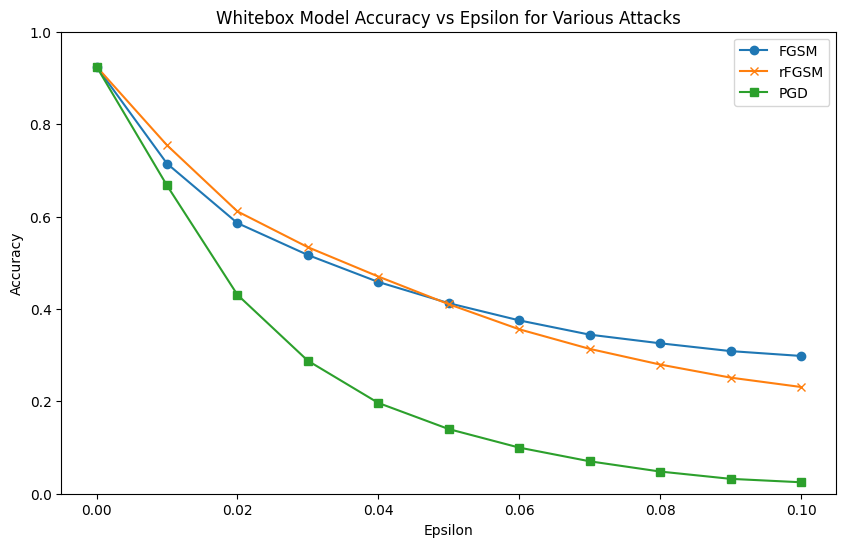

Done!


In [30]:
## Load pretrained models
whitebox = models.NetA()
whitebox.load_state_dict(torch.load("netA_standard.pt"))
whitebox = whitebox.to(device)
whitebox.eval()

test_acc,_ = test_model(whitebox,test_loader,device)
print("Initial Accuracy of Whitebox Model: ",test_acc)

## Test the models against an adversarial attack

# TODO: Set attack parameters here
epsilons = np.linspace(0, 0.1, 11)  # Epsilon values for the attack

# Initialize lists to keep track of accuracies
fgsm_accuracies = []
rfgsm_accuracies = []
pgd_accuracies = []

for ATK_EPS in epsilons:
    fgsm_correct = 0.
    rfgsm_correct = 0.
    pgd_correct = 0.
    running_total = 0.

    for batch_idx,(data,labels) in enumerate(test_loader):
        data = data.to(device)
        labels = labels.to(device)

        # FGSM Attack
        fgsm_data = attacks.FGSM_attack(whitebox, device, data, labels, ATK_EPS)
        # rFGSM Attack
        rfgsm_data = attacks.rFGSM_attack(whitebox, device, data, labels, ATK_EPS)
        # PGD Attack
        ATK_ITERS = 10
        ATK_ALPHA = 1.85 * (ATK_EPS / ATK_ITERS)
        pgd_data = attacks.PGD_attack(whitebox, device, data, labels, ATK_EPS, ATK_ALPHA, ATK_ITERS, rand_start=True)

        # Compute accuracy on perturbed data
        with torch.no_grad():
            # FGSM Accuracy
            fgsm_outputs = whitebox(fgsm_data)
            _, fgsm_preds = fgsm_outputs.max(1)
            fgsm_correct += fgsm_preds.eq(labels).sum().item()
            # rFGSM Accuracy
            rfgsm_outputs = whitebox(rfgsm_data)
            _, rfgsm_preds = rfgsm_outputs.max(1)
            rfgsm_correct += rfgsm_preds.eq(labels).sum().item()
            # PGD Accuracy
            pgd_outputs = whitebox(pgd_data)
            _, pgd_preds = pgd_outputs.max(1)
            pgd_correct += pgd_preds.eq(labels).sum().item()

            running_total += labels.size(0)

    # Calculate and store accuracies for the current epsilon
    fgsm_acc = fgsm_correct / running_total
    rfgsm_acc = rfgsm_correct / running_total
    pgd_acc = pgd_correct / running_total

    fgsm_accuracies.append(fgsm_acc)
    rfgsm_accuracies.append(rfgsm_acc)
    pgd_accuracies.append(pgd_acc)

    # Print accuracies for each epsilon
    print(f"Attack Epsilon: {ATK_EPS:.2f}; FGSM Accuracy: {fgsm_acc:.2f}; rFGSM Accuracy: {rfgsm_acc:.2f}; PGD Accuracy: {pgd_acc:.2f}")

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot for FGSM, rFGSM, and PGD Attacks
plt.plot(epsilons, fgsm_accuracies, marker='o', label='FGSM')
plt.plot(epsilons, rfgsm_accuracies, marker='x', label='rFGSM')
plt.plot(epsilons, pgd_accuracies, marker='s', label='PGD')

plt.title('Whitebox Model Accuracy vs Epsilon for Various Attacks')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()
print("Done!")

### Lab2(d): Blackbox Attack

Initial Accuracy of Whitebox Model:  0.9246
Initial Accuracy of Blackbox Model:  0.924
Attack Epsilon: 0.00; FGSM Accuracy: 0.92; rFGSM Accuracy: 0.92; PGD Accuracy: 0.92
Attack Epsilon: 0.01; FGSM Accuracy: 0.88; rFGSM Accuracy: 0.89; PGD Accuracy: 0.87
Attack Epsilon: 0.02; FGSM Accuracy: 0.82; rFGSM Accuracy: 0.84; PGD Accuracy: 0.80
Attack Epsilon: 0.03; FGSM Accuracy: 0.77; rFGSM Accuracy: 0.79; PGD Accuracy: 0.73
Attack Epsilon: 0.04; FGSM Accuracy: 0.71; rFGSM Accuracy: 0.73; PGD Accuracy: 0.65
Attack Epsilon: 0.05; FGSM Accuracy: 0.66; rFGSM Accuracy: 0.66; PGD Accuracy: 0.57
Attack Epsilon: 0.06; FGSM Accuracy: 0.60; rFGSM Accuracy: 0.61; PGD Accuracy: 0.50
Attack Epsilon: 0.07; FGSM Accuracy: 0.55; rFGSM Accuracy: 0.55; PGD Accuracy: 0.44
Attack Epsilon: 0.08; FGSM Accuracy: 0.50; rFGSM Accuracy: 0.50; PGD Accuracy: 0.39
Attack Epsilon: 0.09; FGSM Accuracy: 0.47; rFGSM Accuracy: 0.46; PGD Accuracy: 0.34
Attack Epsilon: 0.10; FGSM Accuracy: 0.44; rFGSM Accuracy: 0.42; PGD Accu

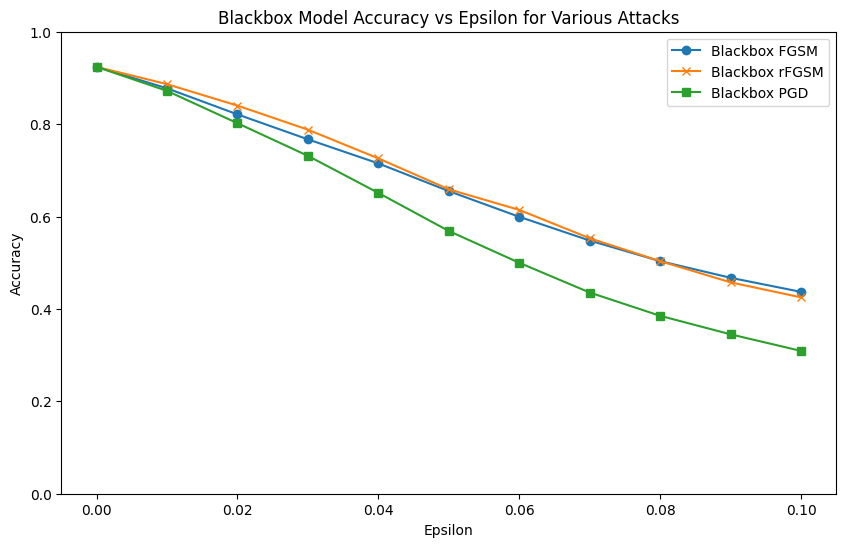

Done!


In [32]:
## Load pretrained models
whitebox = models.NetA()
blackbox = models.NetB()

whitebox.load_state_dict(torch.load("netA_standard.pt"))
blackbox.load_state_dict(torch.load("netB_standard.pt"))

whitebox = whitebox.to(device); blackbox = blackbox.to(device)
whitebox.eval(); blackbox.eval()

test_acc,_ = test_model(whitebox,test_loader,device)
print("Initial Accuracy of Whitebox Model: ",test_acc)
test_acc,_ = test_model(blackbox,test_loader,device)
print("Initial Accuracy of Blackbox Model: ",test_acc)

## Test the models against an adversarial attack
epsilons = np.linspace(0, 0.1, 11)  # Epsilon values for the attack

# Initialize lists to keep track of blackbox accuracies
blackbox_fgsm_accuracies = []
blackbox_rfgsm_accuracies = []
blackbox_pgd_accuracies = []

for ATK_EPS in epsilons:
    blackbox_fgsm_correct = 0.
    blackbox_rfgsm_correct = 0.
    blackbox_pgd_correct = 0.
    total = 0
    ATK_ITERS = 10
    ATK_ALPHA = 1.85 * (ATK_EPS / ATK_ITERS)
    blackbox_correct = 0.
    running_total = 0.

    for batch_idx,(data,labels) in enumerate(test_loader):
        data = data.to(device)
        labels = labels.to(device)


        # FGSM Attack
        fgsm_data = attacks.FGSM_attack(whitebox, device, data, labels, ATK_EPS)
        # rFGSM Attack
        rfgsm_data = attacks.rFGSM_attack(whitebox, device, data, labels, ATK_EPS)
        # PGD Attack
        ATK_ITERS = 10
        ATK_ALPHA = 1.85 * (ATK_EPS / ATK_ITERS)
        pgd_data = attacks.PGD_attack(whitebox, device, data, labels, ATK_EPS, ATK_ALPHA, ATK_ITERS, rand_start=True)

        # Compute accuracy on perturbed data using the blackbox model
        with torch.no_grad():
            blackbox_outputs = blackbox(fgsm_data)
            _, blackbox_preds = blackbox_outputs.max(1)
            blackbox_fgsm_correct += blackbox_preds.eq(labels).sum().item()

            blackbox_outputs = blackbox(rfgsm_data)
            _, blackbox_preds = blackbox_outputs.max(1)
            blackbox_rfgsm_correct += blackbox_preds.eq(labels).sum().item()

            blackbox_outputs = blackbox(pgd_data)
            _, blackbox_preds = blackbox_outputs.max(1)
            blackbox_pgd_correct += blackbox_preds.eq(labels).sum().item()

            running_total += labels.size(0)

    # Calculate and store accuracies for the current epsilon
    blackbox_fgsm_acc = blackbox_fgsm_correct / running_total
    blackbox_rfgsm_acc = blackbox_rfgsm_correct / running_total
    blackbox_pgd_acc = blackbox_pgd_correct / running_total

    blackbox_fgsm_accuracies.append(blackbox_fgsm_acc)
    blackbox_rfgsm_accuracies.append(blackbox_rfgsm_acc)
    blackbox_pgd_accuracies.append(blackbox_pgd_acc)

    # Print accuracies for each epsilon
    print(f"Attack Epsilon: {ATK_EPS:.2f}; FGSM Accuracy: {blackbox_fgsm_acc:.2f}; rFGSM Accuracy: {blackbox_rfgsm_acc:.2f}; PGD Accuracy: {blackbox_pgd_acc:.2f}")


# Plotting the results on the same axes as the blackbox plot from part (b)
plt.figure(figsize=(10, 6))

plt.plot(epsilons, blackbox_fgsm_accuracies, marker='o', label='Blackbox FGSM')
plt.plot(epsilons, blackbox_rfgsm_accuracies, marker='x', label='Blackbox rFGSM')
plt.plot(epsilons, blackbox_pgd_accuracies, marker='s', label='Blackbox PGD')

# Include the previous Random Noise Attack accuracy for comparison if available
plt.title('Blackbox Model Accuracy vs Epsilon for Various Attacks')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

print("Done!")

### Lab3(a): Adversarially train NetA model using FGSM and rFGSM attack

In [33]:
import models
from attacks import FGSM_attack, rFGSM_attack

# Function to perform adversarial training
def adversarial_training(model, train_loader, attack, epsilon, device, optimizer, num_epochs, lr_decay_epoch, checkpoint_name):
    for epoch in range(num_epochs):
        model.train()
        train_correct = 0.
        train_loss = 0.
        train_total = 0.

        for batch_idx, (data, labels) in enumerate(train_loader):
            data, labels = data.to(device), labels.to(device)

            # Generate adversarial examples
            adv_data = attack(model, device, data, labels, epsilon)

            # Forward pass with adversarial data
            outputs = model(adv_data)
            model.zero_grad()
            optimizer.zero_grad()

            # Compute loss, gradients, and update parameters
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update stats
            _, preds = outputs.max(1)
            train_correct += preds.eq(labels).sum().item()
            train_loss += loss.item()
            train_total += labels.size(0)

        # End of training epoch
        test_acc, test_loss = test_model(model, test_loader, device)
        print("Epoch: [ {} / {} ]; TrainAcc: {:.5f}; TrainLoss: {:.5f}; TestAcc: {:.5f}; TestLoss: {:.5f}".format(
            epoch, num_epochs, train_correct/train_total, train_loss/len(train_loader),
            test_acc, test_loss,
        ))

        # Save model
        torch.save(model.state_dict(), checkpoint_name)

        # Update LR
        if epoch == lr_decay_epoch:
            for param_group in optimizer.param_groups:
                param_group['lr'] = initial_lr * 0.1

    print("Done!")



In [34]:
# Initialize the model and optimizer
netA = models.NetA().to(device)
optimizer = torch.optim.Adam(netA.parameters(), lr=0.001)

# Adversarial training with FGSM
adversarial_training(
    model=netA,
    train_loader=train_loader,
    attack=FGSM_attack,
    epsilon=0.1,
    device=device,
    optimizer=optimizer,
    num_epochs=20,
    lr_decay_epoch=15,
    checkpoint_name="netA_advtrain_fgsm0p1.pt"
)

Epoch: [ 0 / 20 ]; TrainAcc: 0.67902; TrainLoss: 0.79330; TestAcc: 0.77890; TestLoss: 0.65614
Epoch: [ 1 / 20 ]; TrainAcc: 0.91310; TrainLoss: 0.24616; TestAcc: 0.53720; TestLoss: 3.47336
Epoch: [ 2 / 20 ]; TrainAcc: 0.76685; TrainLoss: 0.60505; TestAcc: 0.82500; TestLoss: 0.47654
Epoch: [ 3 / 20 ]; TrainAcc: 0.76728; TrainLoss: 0.58931; TestAcc: 0.55800; TestLoss: 2.06051
Epoch: [ 4 / 20 ]; TrainAcc: 0.87170; TrainLoss: 0.34559; TestAcc: 0.50140; TestLoss: 2.53510
Epoch: [ 5 / 20 ]; TrainAcc: 0.86150; TrainLoss: 0.37984; TestAcc: 0.63750; TestLoss: 1.35022
Epoch: [ 6 / 20 ]; TrainAcc: 0.94553; TrainLoss: 0.16471; TestAcc: 0.61510; TestLoss: 1.27578
Epoch: [ 7 / 20 ]; TrainAcc: 0.97100; TrainLoss: 0.09015; TestAcc: 0.63880; TestLoss: 1.12412
Epoch: [ 8 / 20 ]; TrainAcc: 0.97657; TrainLoss: 0.07301; TestAcc: 0.64650; TestLoss: 1.16550
Epoch: [ 9 / 20 ]; TrainAcc: 0.98163; TrainLoss: 0.05721; TestAcc: 0.62610; TestLoss: 1.54834
Epoch: [ 10 / 20 ]; TrainAcc: 0.98000; TrainLoss: 0.06065; T

In [35]:
# Reinitialize the model and optimizer for rFGSM training
netA = models.NetA().to(device)
optimizer = torch.optim.Adam(netA.parameters(), lr=0.001)

# Adversarial training with rFGSM
adversarial_training(
    model=netA,
    train_loader=train_loader,
    attack=rFGSM_attack,
    epsilon=0.1,
    device=device,
    optimizer=optimizer,
    num_epochs=20,
    lr_decay_epoch=15,
    checkpoint_name="netA_advtrain_rfgsm0p1.pt"
)

Epoch: [ 0 / 20 ]; TrainAcc: 0.69385; TrainLoss: 0.75852; TestAcc: 0.83270; TestLoss: 0.44136
Epoch: [ 1 / 20 ]; TrainAcc: 0.76107; TrainLoss: 0.59402; TestAcc: 0.84890; TestLoss: 0.40567
Epoch: [ 2 / 20 ]; TrainAcc: 0.78223; TrainLoss: 0.54381; TestAcc: 0.85280; TestLoss: 0.38428
Epoch: [ 3 / 20 ]; TrainAcc: 0.79535; TrainLoss: 0.50689; TestAcc: 0.86280; TestLoss: 0.36037
Epoch: [ 4 / 20 ]; TrainAcc: 0.80412; TrainLoss: 0.48264; TestAcc: 0.86040; TestLoss: 0.35914
Epoch: [ 5 / 20 ]; TrainAcc: 0.81375; TrainLoss: 0.46269; TestAcc: 0.86190; TestLoss: 0.35602
Epoch: [ 6 / 20 ]; TrainAcc: 0.81893; TrainLoss: 0.44904; TestAcc: 0.87240; TestLoss: 0.33808
Epoch: [ 7 / 20 ]; TrainAcc: 0.82240; TrainLoss: 0.43752; TestAcc: 0.87040; TestLoss: 0.33192
Epoch: [ 8 / 20 ]; TrainAcc: 0.82635; TrainLoss: 0.42920; TestAcc: 0.86940; TestLoss: 0.34521
Epoch: [ 9 / 20 ]; TrainAcc: 0.82842; TrainLoss: 0.42119; TestAcc: 0.86940; TestLoss: 0.34565
Epoch: [ 10 / 20 ]; TrainAcc: 0.83173; TrainLoss: 0.41473; T

### Lab3(b): Adversarially train NetA model using PGD attack

In [36]:
import models
from attacks import PGD_attack

# Function to perform adversarial training with PGD
def adversarial_training_with_PGD(model, train_loader, epsilon, perturb_iters, alpha, device, optimizer, num_epochs, lr_decay_epoch, checkpoint_name):
    for epoch in range(num_epochs):
        model.train()
        train_correct = 0.
        train_loss = 0.
        train_total = 0.

        for batch_idx, (data, labels) in enumerate(train_loader):
            data, labels = data.to(device), labels.to(device)

            # Generate adversarial examples using PGD
            adv_data = PGD_attack(model, device, data, labels, epsilon, alpha, perturb_iters, rand_start=True)

            # Forward pass with adversarial data
            outputs = model(adv_data)
            model.zero_grad()
            optimizer.zero_grad()

            # Compute loss, gradients, and update parameters
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update stats
            _, preds = outputs.max(1)
            train_correct += preds.eq(labels).sum().item()
            train_loss += loss.item()
            train_total += labels.size(0)

        # End of training epoch
        test_acc, test_loss = test_model(model, test_loader, device)
        print("Epoch: [ {} / {} ]; TrainAcc: {:.5f}; TrainLoss: {:.5f}; TestAcc: {:.5f}; TestLoss: {:.5f}".format(
            epoch, num_epochs, train_correct/train_total, train_loss/len(train_loader),
            test_acc, test_loss,
        ))

        # Save model
        torch.save(model.state_dict(), checkpoint_name)

        # Update LR if required
        if epoch == lr_decay_epoch:
            for param_group in optimizer.param_groups:
                param_group['lr'] = initial_lr * 0.1

    print("Done!")

# Initialize the model and optimizer
netA = models.NetA().to(device)
optimizer = torch.optim.Adam(netA.parameters(), lr=0.001)

# Adversarial training with PGD
epsilon = 0.1
perturb_iters = 4
alpha = 1.85 * (epsilon / perturb_iters)

adversarial_training_with_PGD(
    model=netA,
    train_loader=train_loader,
    epsilon=epsilon,
    perturb_iters=perturb_iters,
    alpha=alpha,
    device=device,
    optimizer=optimizer,
    num_epochs=20,
    lr_decay_epoch=15,
    checkpoint_name="netA_advtrain_pgd0p1.pt"
)


Epoch: [ 0 / 20 ]; TrainAcc: 0.64358; TrainLoss: 0.87909; TestAcc: 0.82560; TestLoss: 0.47383
Epoch: [ 1 / 20 ]; TrainAcc: 0.71443; TrainLoss: 0.69932; TestAcc: 0.83320; TestLoss: 0.44608
Epoch: [ 2 / 20 ]; TrainAcc: 0.74385; TrainLoss: 0.63447; TestAcc: 0.83700; TestLoss: 0.42663
Epoch: [ 3 / 20 ]; TrainAcc: 0.75932; TrainLoss: 0.59698; TestAcc: 0.84090; TestLoss: 0.41661
Epoch: [ 4 / 20 ]; TrainAcc: 0.77212; TrainLoss: 0.56936; TestAcc: 0.84280; TestLoss: 0.40850
Epoch: [ 5 / 20 ]; TrainAcc: 0.77813; TrainLoss: 0.54948; TestAcc: 0.84940; TestLoss: 0.39834
Epoch: [ 6 / 20 ]; TrainAcc: 0.78440; TrainLoss: 0.53381; TestAcc: 0.84770; TestLoss: 0.39676
Epoch: [ 7 / 20 ]; TrainAcc: 0.78720; TrainLoss: 0.52622; TestAcc: 0.85370; TestLoss: 0.37986
Epoch: [ 8 / 20 ]; TrainAcc: 0.79183; TrainLoss: 0.51752; TestAcc: 0.85670; TestLoss: 0.37509
Epoch: [ 9 / 20 ]; TrainAcc: 0.79315; TrainLoss: 0.51190; TestAcc: 0.85770; TestLoss: 0.37638
Epoch: [ 10 / 20 ]; TrainAcc: 0.79380; TrainLoss: 0.50729; T

## Test Robust Models

Don't forget to plot accuracy vs. epsilon curves!

In [ ]:
whitebox = models.NetA()
whitebox.load_state_dict(torch.load()) # TODO: Load your robust models
whitebox = whitebox.to(device)
whitebox.eval();

test_acc,_ = test_model(whitebox,test_loader,device)
print("Initial Accuracy of Whitebox Model: ",test_acc)

## Test the model against an adversarial attack

# TODO: Set attack parameters here
#ATK_EPS = ?
#ATK_ITERS = ?
#ATK_ALPHA = ?

whitebox_correct = 0.
running_total = 0.
for batch_idx,(data,labels) in enumerate(test_loader):
    data = data.to(device)
    labels = labels.to(device)

    # TODO: Perform adversarial attack here

    # Sanity checking if adversarial example is "legal"
    assert(torch.max(torch.abs(adv_data-data)) <= (ATK_EPS + 1e-5) )
    assert(adv_data.max() == 1.)
    assert(adv_data.min() == 0.)

    # Compute accuracy on perturbed data
    with torch.no_grad():
        whitebox_outputs = whitebox(adv_data)
        _,whitebox_preds = whitebox_outputs.max(1)
        whitebox_correct += whitebox_preds.eq(labels).sum().item()
        running_total += labels.size(0)

    # Plot some samples
    if batch_idx == 1:
        plt.figure(figsize=(15,5))
        for jj in range(12):
            plt.subplot(2,6,jj+1);plt.imshow(adv_data[jj,0].cpu().numpy(),cmap='gray');plt.axis("off")
        plt.tight_layout()
        plt.show()

# Print final
whitebox_acc = whitebox_correct/running_total
print("Attack Epsilon: {}; Whitebox Accuracy: {}".format(ATK_EPS, whitebox_acc))

print("Done!")

### Lab3(c): Accuracy v.s. Epsilon against various attacks uisng adversarially trained FGSM and rFGSM model

Attack Epsilon: 0.0; Attack Type: fgsm; Whitebox Accuracy: 0.6530
Attack Epsilon: 0.02; Attack Type: fgsm; Whitebox Accuracy: 0.7612
Attack Epsilon: 0.04; Attack Type: fgsm; Whitebox Accuracy: 0.9116
Attack Epsilon: 0.06; Attack Type: fgsm; Whitebox Accuracy: 0.9714
Attack Epsilon: 0.08; Attack Type: fgsm; Whitebox Accuracy: 0.9754
Attack Epsilon: 0.1; Attack Type: fgsm; Whitebox Accuracy: 0.9772
Attack Epsilon: 0.12; Attack Type: fgsm; Whitebox Accuracy: 0.9741
Attack Epsilon: 0.14; Attack Type: fgsm; Whitebox Accuracy: 0.9625
Attack Epsilon: 0.0; Attack Type: rfgsm; Whitebox Accuracy: 0.6530
Attack Epsilon: 0.02; Attack Type: rfgsm; Whitebox Accuracy: 0.4262
Attack Epsilon: 0.04; Attack Type: rfgsm; Whitebox Accuracy: 0.2981
Attack Epsilon: 0.06; Attack Type: rfgsm; Whitebox Accuracy: 0.2110
Attack Epsilon: 0.08; Attack Type: rfgsm; Whitebox Accuracy: 0.1770
Attack Epsilon: 0.1; Attack Type: rfgsm; Whitebox Accuracy: 0.1534
Attack Epsilon: 0.12; Attack Type: rfgsm; Whitebox Accuracy:

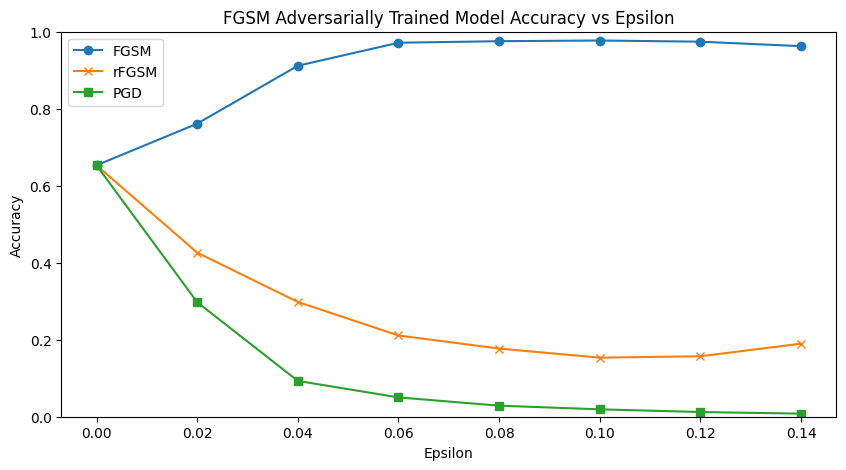

Attack Epsilon: 0.0; Attack Type: fgsm; Whitebox Accuracy: 0.8836
Attack Epsilon: 0.02; Attack Type: fgsm; Whitebox Accuracy: 0.8640
Attack Epsilon: 0.04; Attack Type: fgsm; Whitebox Accuracy: 0.8498
Attack Epsilon: 0.06; Attack Type: fgsm; Whitebox Accuracy: 0.8360
Attack Epsilon: 0.08; Attack Type: fgsm; Whitebox Accuracy: 0.8226
Attack Epsilon: 0.1; Attack Type: fgsm; Whitebox Accuracy: 0.8095
Attack Epsilon: 0.12; Attack Type: fgsm; Whitebox Accuracy: 0.6866
Attack Epsilon: 0.14; Attack Type: fgsm; Whitebox Accuracy: 0.5291
Attack Epsilon: 0.0; Attack Type: rfgsm; Whitebox Accuracy: 0.8836
Attack Epsilon: 0.02; Attack Type: rfgsm; Whitebox Accuracy: 0.8697
Attack Epsilon: 0.04; Attack Type: rfgsm; Whitebox Accuracy: 0.8554
Attack Epsilon: 0.06; Attack Type: rfgsm; Whitebox Accuracy: 0.8448
Attack Epsilon: 0.08; Attack Type: rfgsm; Whitebox Accuracy: 0.8352
Attack Epsilon: 0.1; Attack Type: rfgsm; Whitebox Accuracy: 0.8245
Attack Epsilon: 0.12; Attack Type: rfgsm; Whitebox Accuracy:

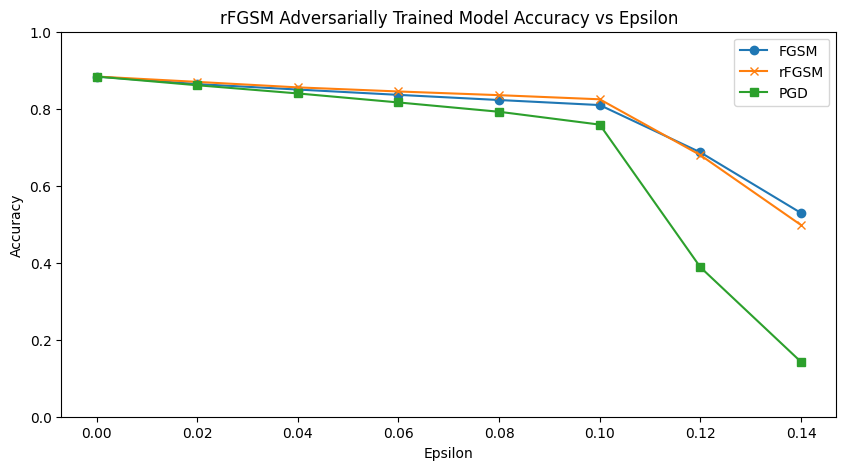

In [38]:
# Function to evaluate the model against various attacks
def evaluate_adversarial_attacks(model, test_loader, device, attack, epsilons, perturb_iters):
    accuracies = []
    for ATK_EPS in epsilons:
        ATK_ALPHA = 1.85 * (ATK_EPS / perturb_iters)
        correct = 0.
        total = 0.
        for data, labels in test_loader:
            data = data.to(device)
            labels = labels.to(device)

            # Perform adversarial attack
            if attack == 'pgd':
                adv_data = PGD_attack(model, device, data, labels, ATK_EPS, ATK_ALPHA, perturb_iters, rand_start=True)
            elif attack == 'rfgsm':
                adv_data = rFGSM_attack(model, device, data, labels, ATK_EPS)
            else:  # 'fgsm'
                adv_data = FGSM_attack(model, device, data, labels, ATK_EPS)

            # Compute accuracy on perturbed data
            with torch.no_grad():
                outputs = model(adv_data)
                _, preds = outputs.max(1)
                correct += preds.eq(labels).sum().item()
                total += labels.size(0)

        # Calculate accuracy for this epsilon
        attack_accuracy = correct / total
        accuracies.append(attack_accuracy)
        print("Attack Epsilon: {}; Attack Type: {}; Whitebox Accuracy: {:.4f}".format(ATK_EPS, attack, attack_accuracy))

    return accuracies

# Load the FGSM adversarially trained model
netA_fgsm = models.NetA().to(device)
netA_fgsm.load_state_dict(torch.load("netA_advtrain_fgsm0p1.pt"))
netA_fgsm.eval()

# Load the rFGSM adversarially trained model
netA_rfgsm = models.NetA().to(device)
netA_rfgsm.load_state_dict(torch.load("netA_advtrain_rfgsm0p1.pt"))
netA_rfgsm.eval()

# Define epsilons
epsilons = np.arange(0.0, 0.16, 0.02)
perturb_iters = 10

# Evaluate FGSM adversarially trained model
fgsm_model_acc_fgsm = evaluate_adversarial_attacks(netA_fgsm, test_loader, device, 'fgsm', epsilons, perturb_iters)
fgsm_model_acc_rfgsm = evaluate_adversarial_attacks(netA_fgsm, test_loader, device, 'rfgsm', epsilons, perturb_iters)
fgsm_model_acc_pgd = evaluate_adversarial_attacks(netA_fgsm, test_loader, device, 'pgd', epsilons, perturb_iters)

# Plot for FGSM adversarially trained model
plt.figure(figsize=(10, 5))
plt.plot(epsilons, fgsm_model_acc_fgsm, marker='o', label='FGSM')
plt.plot(epsilons, fgsm_model_acc_rfgsm, marker='x', label='rFGSM')
plt.plot(epsilons, fgsm_model_acc_pgd, marker='s', label='PGD')
plt.title('FGSM Adversarially Trained Model Accuracy vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

# Evaluate rFGSM adversarially trained model
rfgsm_model_acc_fgsm = evaluate_adversarial_attacks(netA_rfgsm, test_loader, device, 'fgsm', epsilons, perturb_iters)
rfgsm_model_acc_rfgsm = evaluate_adversarial_attacks(netA_rfgsm, test_loader, device, 'rfgsm', epsilons, perturb_iters)
rfgsm_model_acc_pgd = evaluate_adversarial_attacks(netA_rfgsm, test_loader, device, 'pgd', epsilons, perturb_iters)

# Plot for rFGSM adversarially trained model
plt.figure(figsize=(10, 5))
plt.plot(epsilons, rfgsm_model_acc_fgsm, marker='o', label='FGSM')
plt.plot(epsilons, rfgsm_model_acc_rfgsm, marker='x', label='rFGSM')
plt.plot(epsilons, rfgsm_model_acc_pgd, marker='s', label='PGD')
plt.title('rFGSM Adversarially Trained Model Accuracy vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()


### Lab3(d): Accuracy v.s. Epsilon against various attacks uisng adversarially trained PGD model

Attack Epsilon: 0.0; Attack Type: fgsm; Whitebox Accuracy: 0.8684
Attack Epsilon: 0.02; Attack Type: fgsm; Whitebox Accuracy: 0.8530
Attack Epsilon: 0.04; Attack Type: fgsm; Whitebox Accuracy: 0.8383
Attack Epsilon: 0.06; Attack Type: fgsm; Whitebox Accuracy: 0.8290
Attack Epsilon: 0.08; Attack Type: fgsm; Whitebox Accuracy: 0.8178
Attack Epsilon: 0.1; Attack Type: fgsm; Whitebox Accuracy: 0.8079
Attack Epsilon: 0.12; Attack Type: fgsm; Whitebox Accuracy: 0.7727
Attack Epsilon: 0.14; Attack Type: fgsm; Whitebox Accuracy: 0.6310
Attack Epsilon: 0.0; Attack Type: rfgsm; Whitebox Accuracy: 0.8684
Attack Epsilon: 0.02; Attack Type: rfgsm; Whitebox Accuracy: 0.8567
Attack Epsilon: 0.04; Attack Type: rfgsm; Whitebox Accuracy: 0.8461
Attack Epsilon: 0.06; Attack Type: rfgsm; Whitebox Accuracy: 0.8362
Attack Epsilon: 0.08; Attack Type: rfgsm; Whitebox Accuracy: 0.8288
Attack Epsilon: 0.1; Attack Type: rfgsm; Whitebox Accuracy: 0.8194
Attack Epsilon: 0.12; Attack Type: rfgsm; Whitebox Accuracy:

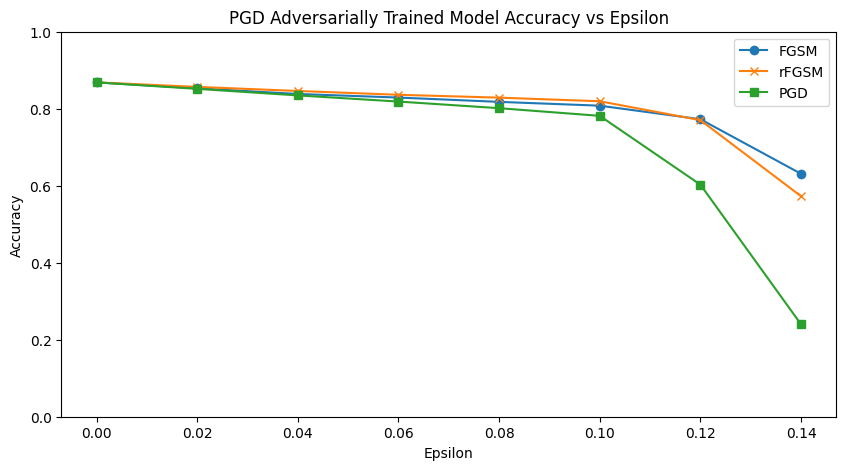

In [42]:
# Function to evaluate the model against various attacks
def evaluate_adversarial_attacks(model, test_loader, device, attack, epsilons, perturb_iters):
    accuracies = []
    for ATK_EPS in epsilons:
        ATK_ALPHA = 1.85 * (ATK_EPS / perturb_iters)
        correct = 0.
        total = 0.
        for data, labels in test_loader:
            data = data.to(device)
            labels = labels.to(device)

            # Perform adversarial attack
            if attack == 'pgd':
                adv_data = PGD_attack(model, device, data, labels, ATK_EPS, ATK_ALPHA, perturb_iters, rand_start=True)
            elif attack == 'rfgsm':
                adv_data = rFGSM_attack(model, device, data, labels, ATK_EPS)
            else:  # 'fgsm'
                adv_data = FGSM_attack(model, device, data, labels, ATK_EPS)

            # Compute accuracy on perturbed data
            with torch.no_grad():
                outputs = model(adv_data)
                _, preds = outputs.max(1)
                correct += preds.eq(labels).sum().item()
                total += labels.size(0)

        # Calculate accuracy for this epsilon
        attack_accuracy = correct / total
        accuracies.append(attack_accuracy)
        print("Attack Epsilon: {}; Attack Type: {}; Whitebox Accuracy: {:.4f}".format(ATK_EPS, attack, attack_accuracy))

    return accuracies


# Load the PGD adversarially trained model
netA_pgd = models.NetA().to(device)
netA_pgd.load_state_dict(torch.load("netA_advtrain_pgd0p1.pt"))
netA_pgd.eval()

# Define epsilons
epsilons = np.arange(0.0, 0.16, 0.02)
perturb_iters = 10

# Evaluate PGD adversarially trained model
pgd_model_acc_fgsm = evaluate_adversarial_attacks(netA_pgd, test_loader, device, 'fgsm', epsilons, perturb_iters)
pgd_model_acc_rfgsm = evaluate_adversarial_attacks(netA_pgd, test_loader, device, 'rfgsm', epsilons, perturb_iters)
pgd_model_acc_pgd = evaluate_adversarial_attacks(netA_pgd, test_loader, device, 'pgd', epsilons, perturb_iters)

# Plot for PGD adversarially trained model
plt.figure(figsize=(10, 5))
plt.plot(epsilons, pgd_model_acc_fgsm, marker='o', label='FGSM')
plt.plot(epsilons, pgd_model_acc_rfgsm, marker='x', label='rFGSM')
plt.plot(epsilons, pgd_model_acc_pgd, marker='s', label='PGD')
plt.title('PGD Adversarially Trained Model Accuracy vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()


### Lab3(e): PDG-based AT with various epsilon values

In [44]:
# Function to perform adversarial training with PGD
def adversarial_training_with_PGD(model, train_loader, epsilon, perturb_iters, alpha, device, optimizer, num_epochs, lr_decay_epoch, checkpoint_name):
    for epoch in range(num_epochs):
        model.train()
        train_correct = 0.
        train_loss = 0.
        train_total = 0.
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)

            # Generate adversarial examples using PGD
            adv_data = PGD_attack(model, device, data, labels, epsilon, alpha, perturb_iters, rand_start=True)

            # Forward pass with adversarial data
            outputs = model(adv_data)
            model.zero_grad()
            optimizer.zero_grad()

            # Compute loss, gradients, and update parameters
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()

            # Update stats
            _, preds = outputs.max(1)
            train_correct += preds.eq(labels).sum().item()
            train_loss += loss.item()
            train_total += labels.size(0)

        # End of training epoch
        test_acc, test_loss = test_model(model, test_loader, device)
        print(f"Epoch: {epoch}; Epsilon: {epsilon}; Train Acc: {train_correct/train_total:.4f}; Test Acc: {test_acc:.4f}")

        # Save model checkpoint
        if epoch == num_epochs - 1:
            torch.save(model.state_dict(), checkpoint_name)

        # Update learning rate
        if epoch == lr_decay_epoch:
            for param_group in optimizer.param_groups:
                param_group['lr'] = optimizer.param_groups[0]['lr'] * 0.1

# Function to evaluate the model against PGD attacks
def evaluate_adversarial_attacks(model, test_loader, device, attack_epsilons, perturb_iters):
    model.eval()
    accuracies = []
    for ATK_EPS in attack_epsilons:
        correct = 0.
        total = 0.
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            adv_data = PGD_attack(model, device, data, labels, ATK_EPS, ATK_EPS / perturb_iters * 1.85, perturb_iters, rand_start=True)

            # Compute accuracy on perturbed data
            with torch.no_grad():
                outputs = model(adv_data)
                _, preds = outputs.max(1)
                correct += preds.eq(labels).sum().item()
                total += labels.size(0)

        accuracy = correct / total
        accuracies.append(accuracy)
        print(f"Attack Epsilon: {ATK_EPS}; Whitebox Accuracy: {accuracy}")
    return accuracies

# Define the training parameters
num_epochs = 20
lr_decay_epoch = 15
initial_lr = 0.001
perturb_iters = 10

# Epsilons to use for training
training_epsilons = [0.05, 0.1, 0.15]

# Define attack epsilons for testing
attack_epsilons = np.arange(0, 0.31, 0.05)

# Train models with different epsilon values and evaluate
for training_epsilon in training_epsilons:
    # Initialize the model and optimizer
    model = models.NetA().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=initial_lr)

    # Adversarially train the model
    adversarial_training_with_PGD(model, train_loader, training_epsilon, perturb_iters,
                                  training_epsilon / perturb_iters * 1.85, device,
                                  optimizer, num_epochs, lr_decay_epoch,
                                  f"netA_advtrain_pgd{training_epsilon}.pt")

    # Evaluate on clean data
    clean_acc, _ = test_model(model, test_loader, device)
    print(f"Clean data accuracy for training epsilon {training_epsilon}: {clean_acc:.4f}")

    # Evaluate robustness against PGD attacks
    robustness = evaluate_adversarial_attacks(model, test_loader, device, attack_epsilons, perturb_iters)
    print(f"Robustness for training epsilon {training_epsilon}: {robustness}")


Epoch: 0; Epsilon: 0.05; Train Acc: 0.7229; Test Acc: 0.8519
Epoch: 1; Epsilon: 0.05; Train Acc: 0.7790; Test Acc: 0.8582
Epoch: 2; Epsilon: 0.05; Train Acc: 0.7944; Test Acc: 0.8650
Epoch: 3; Epsilon: 0.05; Train Acc: 0.8029; Test Acc: 0.8694
Epoch: 4; Epsilon: 0.05; Train Acc: 0.8089; Test Acc: 0.8690
Epoch: 5; Epsilon: 0.05; Train Acc: 0.8155; Test Acc: 0.8748
Epoch: 6; Epsilon: 0.05; Train Acc: 0.8199; Test Acc: 0.8774
Epoch: 7; Epsilon: 0.05; Train Acc: 0.8249; Test Acc: 0.8786
Epoch: 8; Epsilon: 0.05; Train Acc: 0.8256; Test Acc: 0.8776
Epoch: 9; Epsilon: 0.05; Train Acc: 0.8312; Test Acc: 0.8761
Epoch: 10; Epsilon: 0.05; Train Acc: 0.8316; Test Acc: 0.8793
Epoch: 11; Epsilon: 0.05; Train Acc: 0.8341; Test Acc: 0.8840
Epoch: 12; Epsilon: 0.05; Train Acc: 0.8374; Test Acc: 0.8870
Epoch: 13; Epsilon: 0.05; Train Acc: 0.8377; Test Acc: 0.8875
Epoch: 14; Epsilon: 0.05; Train Acc: 0.8404; Test Acc: 0.8888
Epoch: 15; Epsilon: 0.05; Train Acc: 0.8422; Test Acc: 0.8848
Epoch: 16; Epsilon

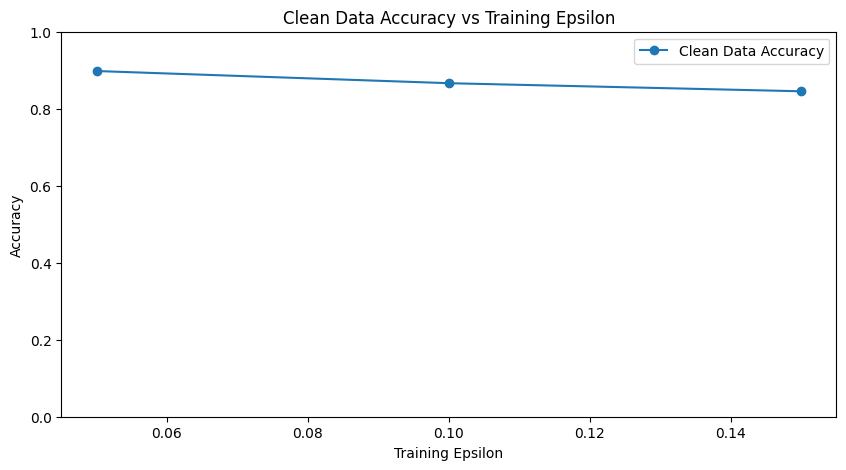

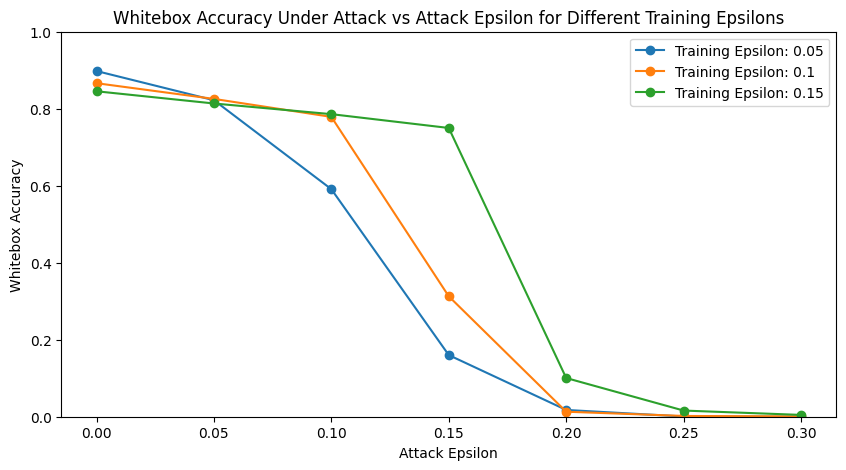

In [51]:
# Dummy data based on the provided outputs
# Clean data accuracy for different training epsilon values
clean_data_accuracies = {
    0.05: 0.8979,
    0.10: 0.8663,
    0.15: 0.8453,
}

# Whitebox accuracies for different training epsilon values under attack
whitebox_accuracies_under_attack = {
    0.05: [0.8979, 0.8221, 0.591, 0.1601, 0.0176, 0.0006, 0.0],
    0.10: [0.8663, 0.8255, 0.7788, 0.3127, 0.013, 0.002, 0.0007],
    0.15: [0.8453, 0.8136, 0.7859, 0.75, 0.1005, 0.016, 0.0047],
}

# Attack epsilon values used during testing
attack_epsilons = np.arange(0, 0.31, 0.05)

# Plotting clean data accuracies
plt.figure(figsize=(10, 5))
plt.plot(list(clean_data_accuracies.keys()), list(clean_data_accuracies.values()), marker='o', label='Clean Data Accuracy')
plt.title('Clean Data Accuracy vs Training Epsilon')
plt.xlabel('Training Epsilon')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
# Plotting whitebox accuracies under attack for different training epsilons
for train_eps, acc_under_attack in whitebox_accuracies_under_attack.items():
    plt.plot(attack_epsilons, acc_under_attack, marker='o', label=f'Training Epsilon: {train_eps}')

plt.title('Whitebox Accuracy Under Attack vs Attack Epsilon for Different Training Epsilons')
plt.xlabel('Attack Epsilon')
plt.ylabel('Whitebox Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()


### Lab3(f): Saliency map on standard and PGD-AT models

Saliency maps for the standard model:


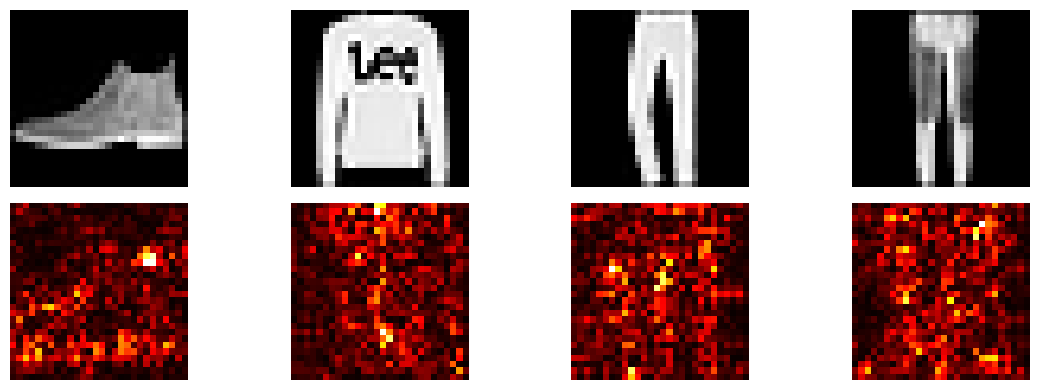

Saliency maps for the PGD-AT model:


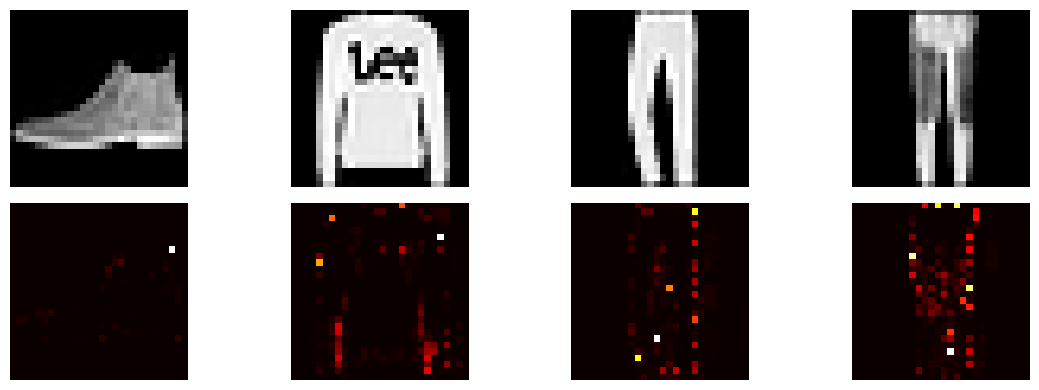

In [52]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Function to compute saliency maps
def compute_saliency_maps(model, data, labels, device):
    model.eval()
    data, labels = data.to(device), labels.to(device)

    # Make input tensors require gradient
    data.requires_grad_()

    # Forward pass
    outputs = model(data)
    model.zero_grad()

    # Compute the loss and perform backward pass
    loss = torch.nn.functional.cross_entropy(outputs, labels)
    loss.backward()

    # Saliency is the absolute value of the gradient
    saliency = data.grad.abs()

    return saliency

# Function to plot saliency maps
def plot_saliency_maps(data, saliency_maps):
    # Convert data and saliency to numpy for visualization
    data_np = data.detach().cpu().numpy()
    saliency_np = saliency_maps.detach().cpu().numpy()

    # Plot the data and their saliency maps
    fig, axes = plt.subplots(2, len(data_np), figsize=(12, 4))
    for i in range(len(data_np)):
        axes[0, i].imshow(data_np[i].squeeze(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(saliency_np[i].squeeze(), cmap='hot')
        axes[1, i].axis('off')
    plt.tight_layout()
    plt.show()

# Load the FashionMNIST test set
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

# Load your models
standard_model = models.NetA().to(device)
standard_model.load_state_dict(torch.load('netA_standard.pt'))

pgd_at_model = models.NetA().to(device)
pgd_at_model.load_state_dict(torch.load('netA_advtrain_pgd0p1.pt'))

# Get some test data
data, labels = next(iter(test_loader))
data, labels = data.to(device), labels.to(device)

# Compute saliency maps
standard_saliency = compute_saliency_maps(standard_model, data, labels, device)
pgd_at_saliency = compute_saliency_maps(pgd_at_model, data, labels, device)

# Plot saliency maps
print("Saliency maps for the standard model:")
plot_saliency_maps(data, standard_saliency)
print("Saliency maps for the PGD-AT model:")
plot_saliency_maps(data, pgd_at_saliency)
